<a href="https://colab.research.google.com/github/musama00/Product-Demand-Prediction-Using-Machine-Learning-FYP-/blob/main/FYP_Subset_(Product_Demand_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [ ]:

data = pd.read_csv("Walmart.csv")
data['Holiday_Flag'] = data['Holiday_Flag'].astype(int)

data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

In [ ]:
# train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv.zip')
# stores = pd.read_csv('/content/drive/MyDrive/dataset/stores.csv')
# features = pd.read_csv('/content/drive/MyDrive/dataset/features.csv.zip')
# train = train.merge(stores, on='Store', how = 'left')
# train = train.merge(features, on= ['Store', 'Date'], how='left')
# # Selecting the required columns from the train DataFrame
# selected_columns = ['Store', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# # Renaming 'IsHoliday_x' to 'Holiday_Flag' to match the required column names
# data = train[selected_columns].rename(columns={'IsHoliday_x': 'Holiday_Flag'})

# data['Holiday_Flag'] = data['Holiday_Flag'].astype(int)

# data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")

# Display the modified DataFrame
# data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
data["Weekly_Sales"].min()

209986.25

In [ ]:
data["Weekly_Sales"].max()

3818686.45

In [ ]:
data["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
data["Store"].nunique()

45

In [ ]:
data["Store"].value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

In [ ]:
data["Temperature"].nunique()

3528

In [ ]:
data["Unemployment"].nunique()

349

In [ ]:
data["CPI"].nunique()

2145

In [ ]:
data["Holiday_Flag"].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [ ]:
print(f"Data is from {data['Date'].iloc[0]}, to date {data['Date'].iloc[-1]}")


Data is from 2010-02-05 00:00:00, to date 2012-10-26 00:00:00


In [ ]:
print(data.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")


/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


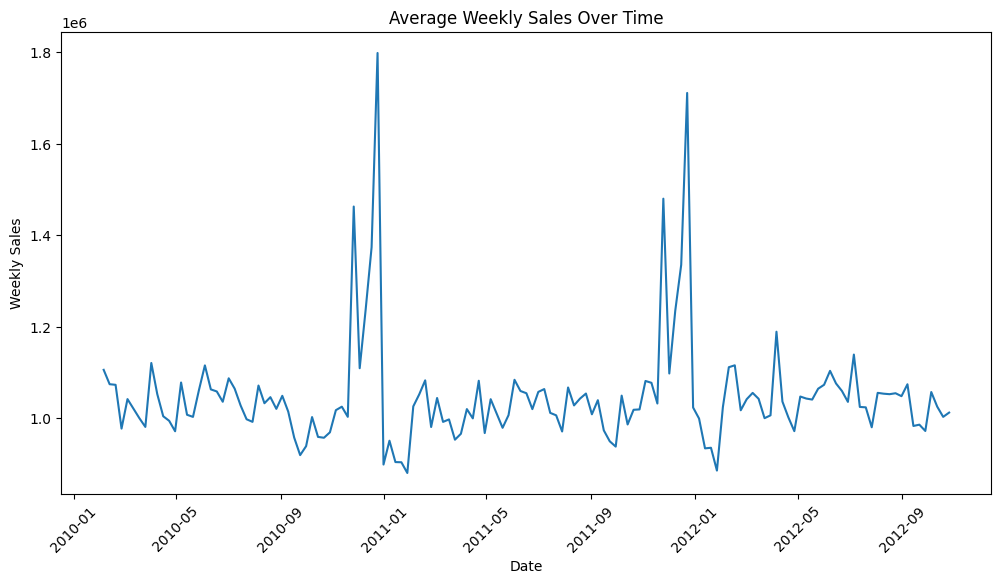

In [ ]:
# Visualization: Sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data, errorbar=None)
plt.title('Average Weekly Sales Over Time')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.show()



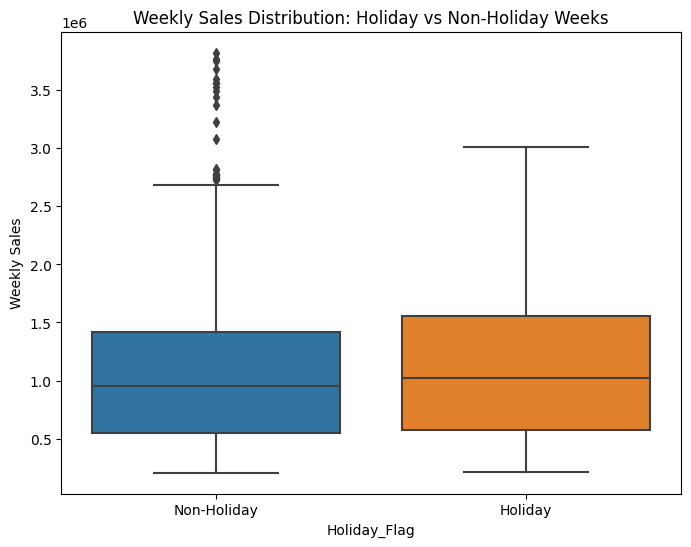

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday Weeks')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.ylabel('Weekly Sales')
plt.show()

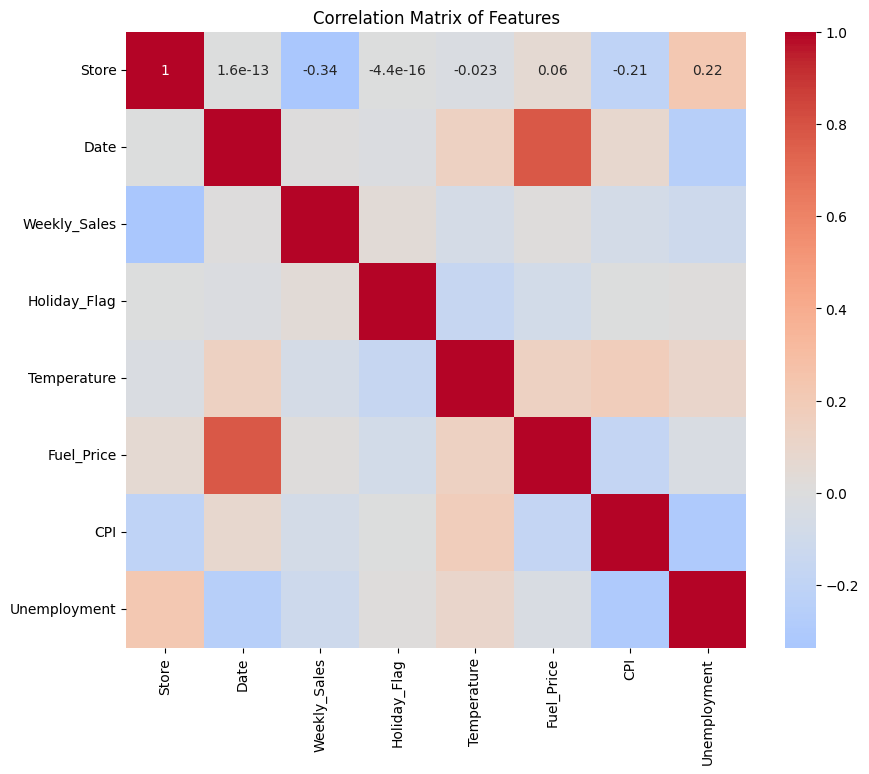

In [ ]:
# Calculate correlations
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

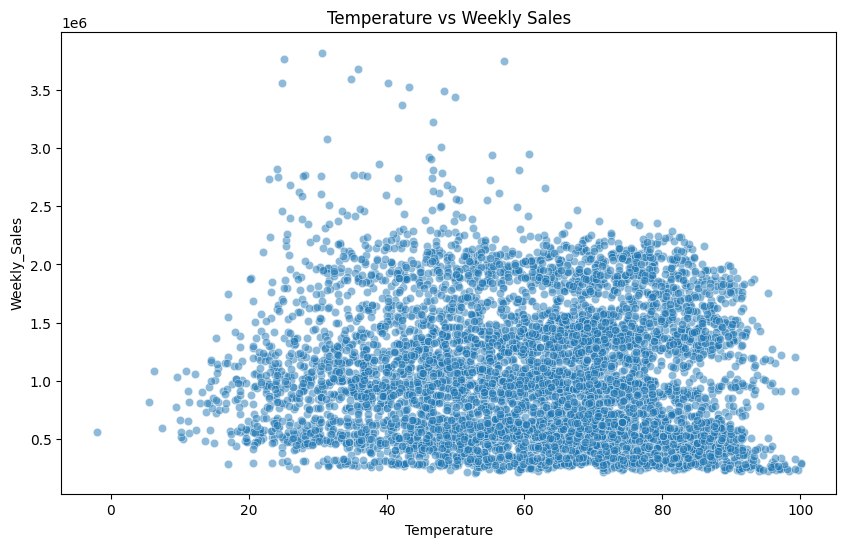

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, alpha=0.5)
plt.title('Temperature vs Weekly Sales')
plt.show()

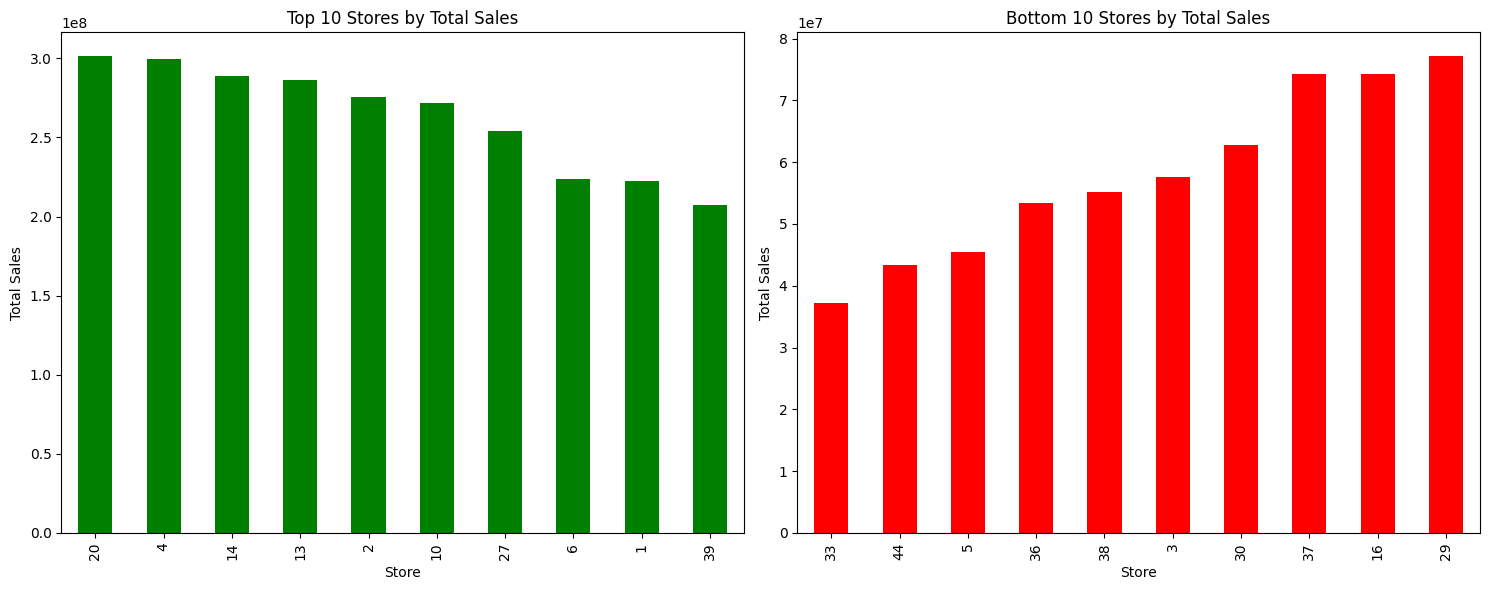

In [ ]:
# Store-wise analysis
def plot_store_analysis(data):
    # Top 10 stores by sales
    top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)



    # Bottom 10 stores by sales
    bottom_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values().head(10)

    plt.figure(figsize=(15, 6))

    # Top stores
    plt.subplot(1, 2, 1)
    top_stores.plot(kind='bar', color='green', title='Top 10 Stores by Total Sales')
    plt.ylabel('Total Sales')

    # Bottom stores
    plt.subplot(1, 2, 2)
    bottom_stores.plot(kind='bar', color='red', title='Bottom 10 Stores by Total Sales')
    plt.ylabel('Total Sales')

    plt.tight_layout()
    plt.show()

    return top_stores
top_stores = plot_store_analysis(data)


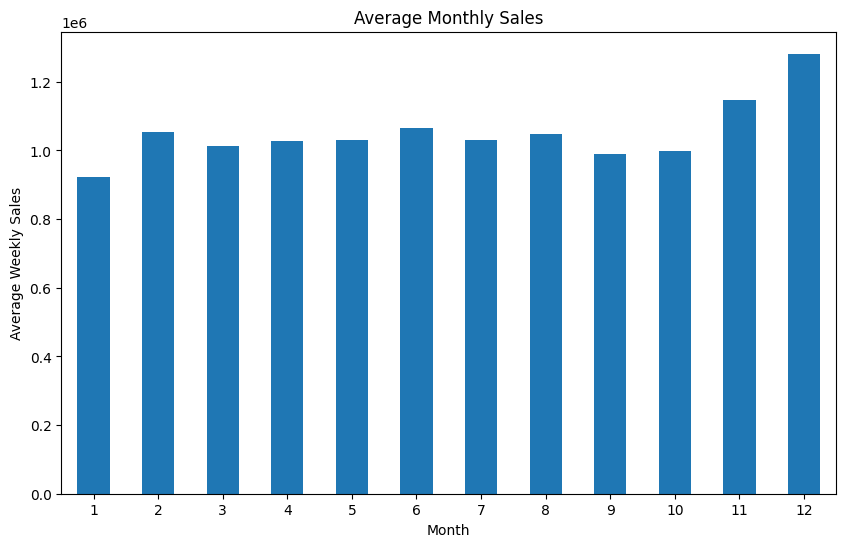

In [ ]:
# Extract month from date
data['Month'] = data['Date'].dt.month

# Plot monthly sales
plt.figure(figsize=(10, 6))
data.groupby('Month')['Weekly_Sales'].mean().plot(kind='bar')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

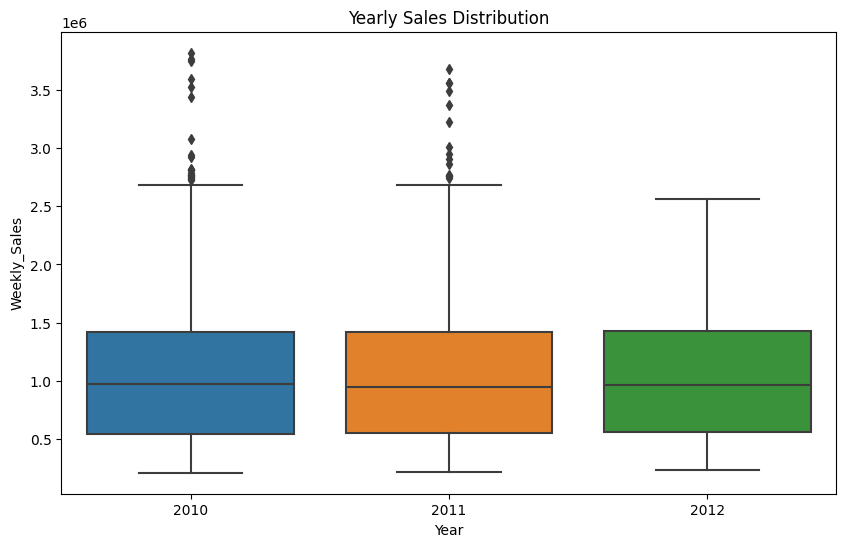

In [ ]:
data['Year'] = data['Date'].dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Weekly_Sales', data=data)
plt.title('Yearly Sales Distribution')
plt.show()

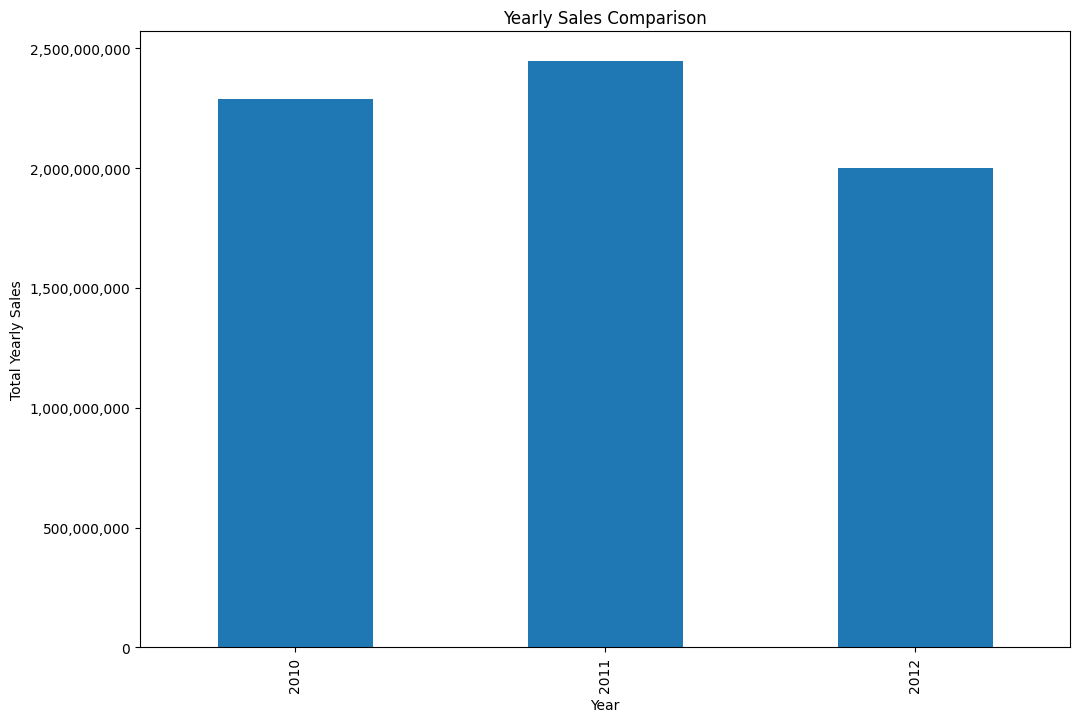

In [ ]:
# Assuming `data` is your DataFrame
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum()

# Plot settings for large data
plt.figure(figsize=(12, 8))

# Yearly sales trend
ax = yearly_sales.plot(kind='bar', title='Yearly Sales Comparison')
plt.ylabel('Total Yearly Sales')

# Format y-axis to show exact values
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


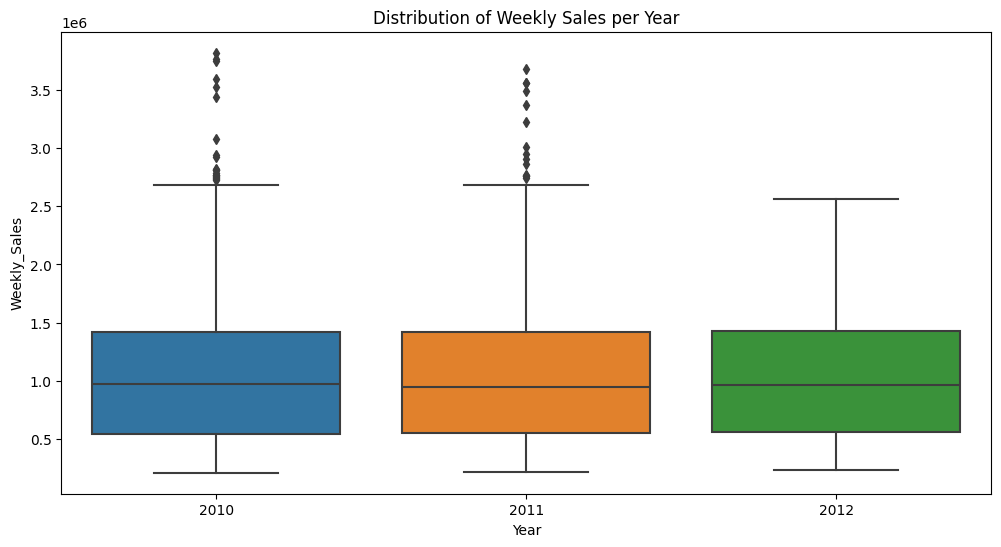

In [ ]:
# Visualization: Sales distribution per year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Weekly_Sales', data=data)
plt.title("Distribution of Weekly Sales per Year")
plt.show()



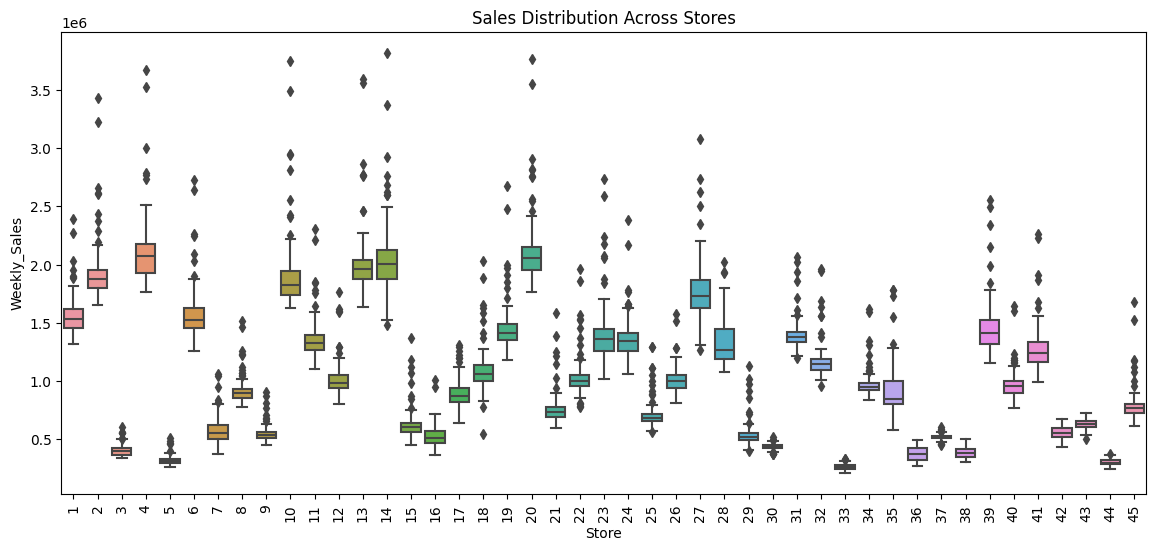

In [ ]:
# Visualization: Sales Distribution by Store
plt.figure(figsize=(14, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.title("Sales Distribution Across Stores")
plt.xticks(rotation=90)
plt.show()



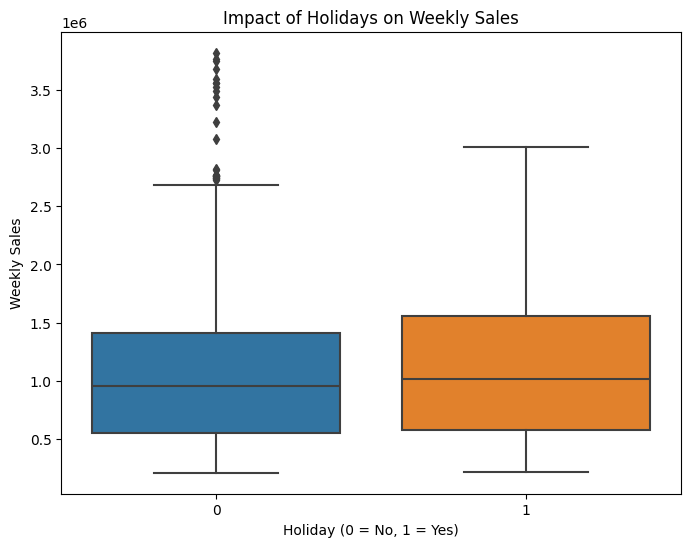

In [ ]:
# Visualization: Impact of Holidays on Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title("Impact of Holidays on Weekly Sales")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Weekly Sales")
plt.show()



/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/seaborn/_oldcor

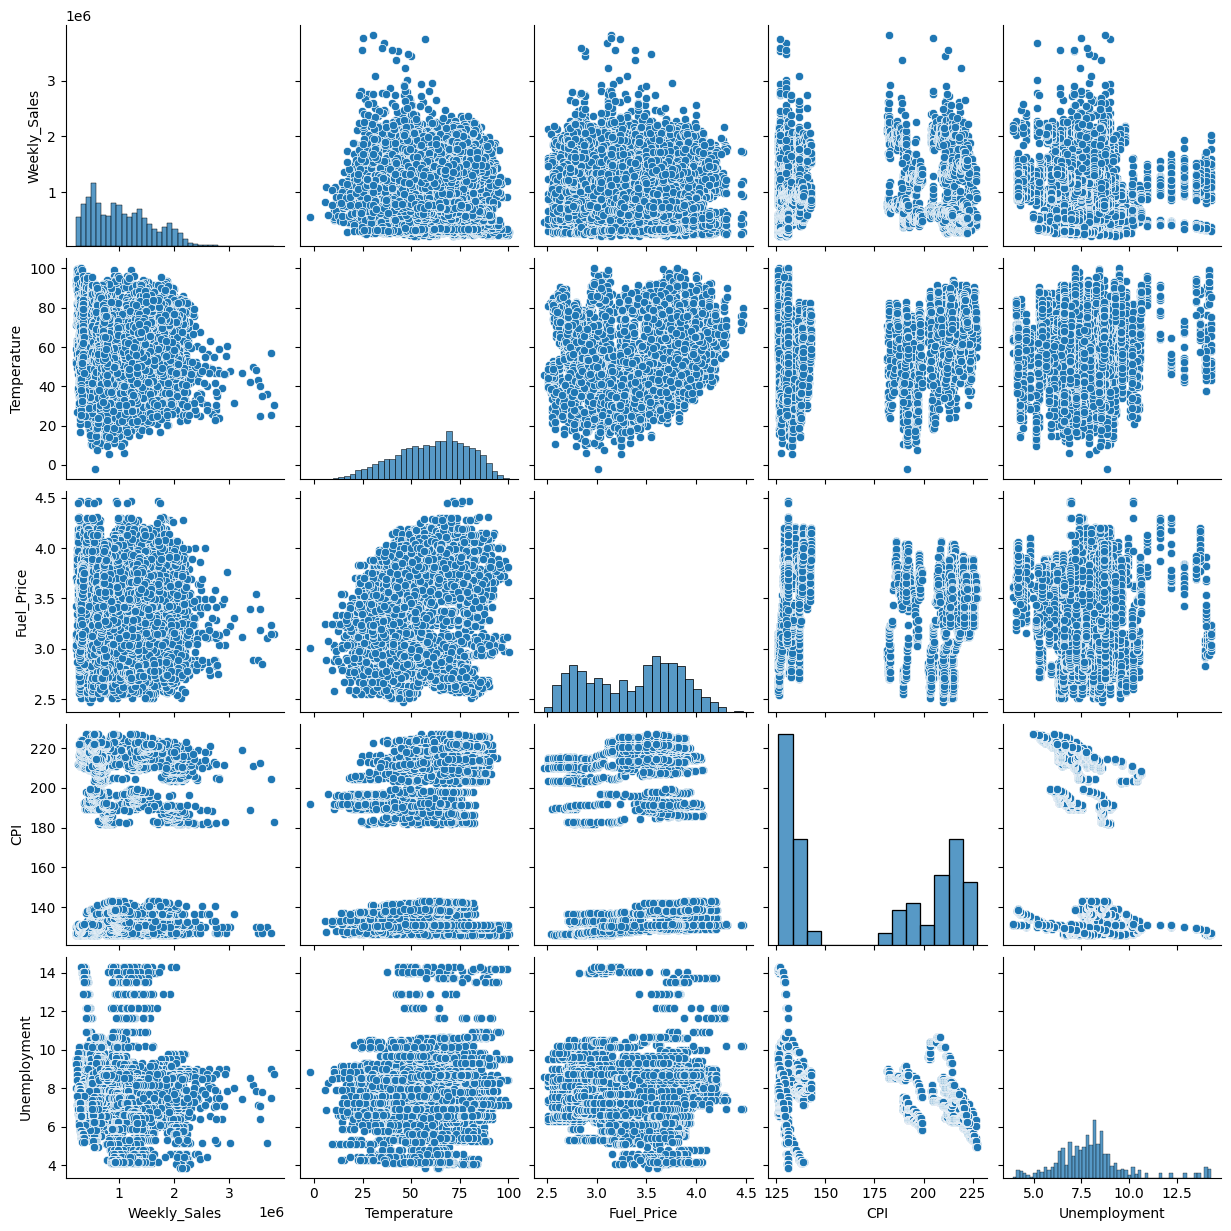

In [ ]:
# Pairplot to visualize relationships

sns.pairplot(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()


In [ ]:
data.describe()


Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment        Month  \
count  6435.000000  6435.000000  6435.000000   6435.000000  6435.000000   
mean     60.663782     3.358607   171.578394      7.999151     6.447552   
min      -2.060000     2.472000   126.064000      3.879000     1.000000   
25%      47.460000     2.933000   131.735000      6.891000     4.000000   
50%      62.670000     3.445000   182.616521      7.874000     6.000000   
75%      74.940000     3.735000   212.743293      8.622000     9.000000   
max     100.140000     4.468000   227.232807     14.313000    12.000000   
std      18.444933     0.459020    39.356712      1.875885     3.238308   

              Year  
count  6435.000000  
mean   2010.965035  
min    2010.000000  
25%    2010.000000  
50%    2011.000000  
75%    2012.000000  
max    2012.000000  
std       0.797019

In [ ]:
# Convert Date to datetime and extract features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data['Day'] = data['Date'].dt.day

# Drop the original Date column
# data.drop('Date', axis=1, inplace=True)

# Check for duplicates
print(f"Duplicate rows: {data.duplicated().sum()}")

# Check for outliers
# numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
# df[numeric_cols].boxplot()
# plt.xticks(rotation=45)
# plt.show()

Duplicate rows: 0


In [ ]:
#Appying ML Models on Store 1 only
# Filter data for Store 1
data_store_1 = data[data["Store"] == 1]

In [ ]:
# Create lag features for time series
data.sort_values(['Store', 'Year', 'Month', 'Week'], inplace=True)
for lag in [1, 2, 3, 4]:
    data_store_1[f'Weekly_Sales_lag_{lag}'] = data_store_1.groupby('Store')['Weekly_Sales'].shift(lag)

# Create rolling statistics
data_store_1['Weekly_Sales_rolling_mean_4'] = data_store_1.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(4).mean())
data_store_1['Weekly_Sales_rolling_std_4'] = data_store_1.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(4).std())

# Drop rows with NaN values created by lag features
data_store_1.dropna(inplace=True)

/tmp/ipykernel_38337/3783284750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_store_1[f'Weekly_Sales_lag_{lag}'] = data_store_1.groupby('Store')['Weekly_Sales'].shift(lag)
/tmp/ipykernel_38337/3783284750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_store_1[f'Weekly_Sales_lag_{lag}'] = data_store_1.groupby('Store')['Weekly_Sales'].shift(lag)
/tmp/ipykernel_38337/3783284750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [ ]:
data_store_1.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
4      1 2010-03-05    1554806.68             0        46.50       2.625   
5      1 2010-03-12    1439541.59             0        57.79       2.667   
6      1 2010-03-19    1472515.79             0        54.58       2.720   
7      1 2010-03-26    1404429.92             0        51.45       2.732   
8      1 2010-04-02    1594968.28             0        62.27       2.719   

          CPI  Unemployment  Month  Year  Week  Day  Weekly_Sales_lag_1  \
4  211.350143         8.106      3  2010     9    5          1409727.59   
5  211.380643         8.106      3  2010    10   12          1554806.68   
6  211.215635         8.106      3  2010    11   19          1439541.59   
7  211.018042         8.106      3  2010    12   26          1472515.79   
8  210.820450         7.808      4  2010    13    2          1404429.92   

   Weekly_Sales_lag_2  Weekly_Sales_lag_3  Weekly_Sales_lag_4  \
4          1611968.17          1641957.44          1643690.90   
5          1409727.59          1611968.17          1641957.44   
6          1554806.68          1409727.59          1611968.17   
7          1439541.59          1554806.68          1409727.59   
8          1472515.79          1439541.59          1554806.68   

   Weekly_Sales_rolling_mean_4  Weekly_Sales_rolling_std_4  
4                 1.554615e+06               103135.002548  
5                 1.504011e+06                95360.050839  
6                 1.469148e+06                62599.457150  
7                 1.467823e+06                64308.381016  
8                 1.477864e+06                82871.762296

Correlation with Weekly_Sales:
 Weekly_Sales                   1.000000
Weekly_Sales_rolling_mean_4    0.588884
Weekly_Sales_rolling_std_4     0.327392
Weekly_Sales_lag_1             0.303087
Weekly_Sales_lag_4             0.238193
CPI                            0.235468
Date                           0.232642
Month                          0.214791
Week                           0.192806
Holiday_Flag                   0.190941
Year                           0.161591
Fuel_Price                     0.136815
Weekly_Sales_lag_2             0.130317
Weekly_Sales_lag_3             0.063760
Unemployment                  -0.106331
Temperature                   -0.224838
Day                           -0.262898
Store                               NaN
Name: Weekly_Sales, dtype: float64
Selected features: ['Weekly_Sales_rolling_mean_4', 'Weekly_Sales_rolling_std_4', 'Weekly_Sales_lag_1', 'Weekly_Sales_lag_4', 'CPI', 'Date', 'Month', 'Week', 'Holiday_Flag', 'Year', 'Fuel_Price', 'Weekly_Sales_lag_

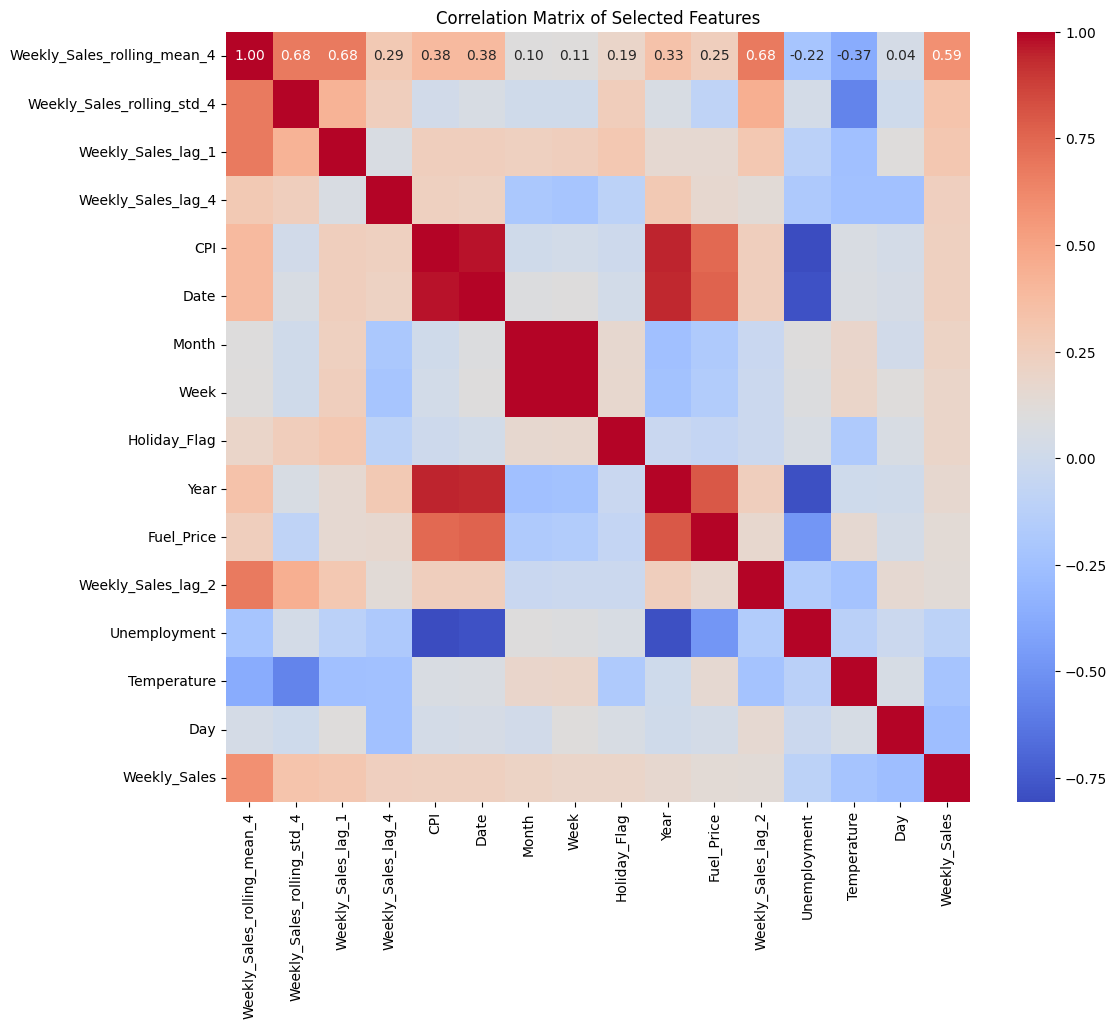

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = data_store_1.corr()

# Correlation with target variable
corr_with_target = corr_matrix['Weekly_Sales'].sort_values(ascending=False)
print("Correlation with Weekly_Sales:\n", corr_with_target)

# Select features with correlation > 0.1 or < -0.1, excluding the target itself
selected_features = corr_with_target[abs(corr_with_target) > 0.1].drop('Weekly_Sales').index.tolist()

print("Selected features:", selected_features)

# Plot the correlation matrix of only the selected features + target
plt.figure(figsize=(12, 10))
sns.heatmap(data_store_1[selected_features + ['Weekly_Sales']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [ ]:
# Split into features and target
selected_features = [f for f in selected_features if f != "Date"]

X = data_store_1[selected_features]
y = data_store_1['Weekly_Sales']

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

print("Random Forest Results:")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")

Random Forest Results:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
RMSE: 123038.27255528292
R2 Score: 0.5899981589959953


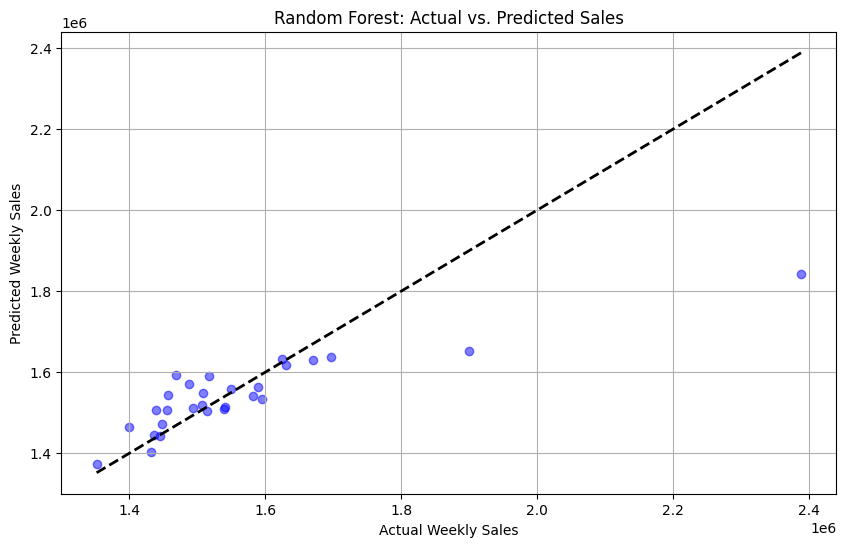

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Random Forest: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

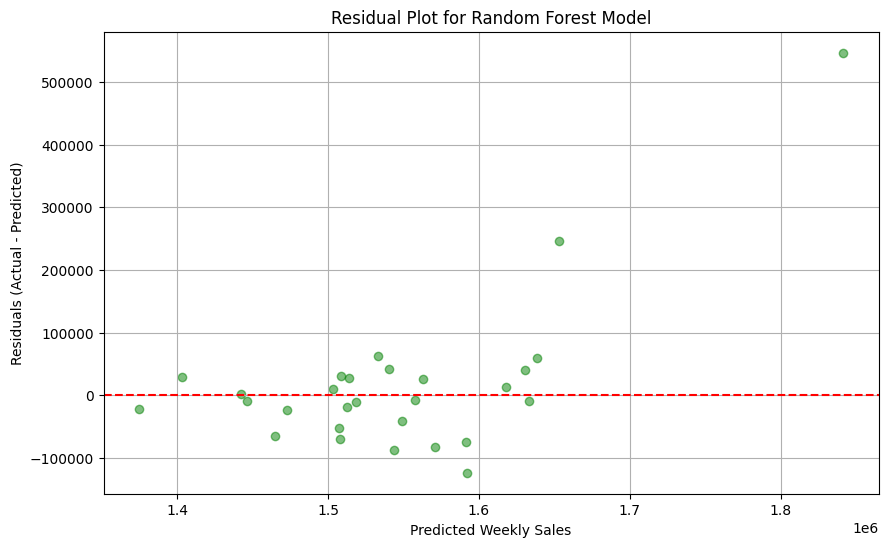

In [ ]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Random Forest Model')
plt.grid(True)
plt.show()

In [ ]:
import shap

# Load your trained RF model (or use best_rf from your training)
model = best_rf

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train_scaled)  # Use scaled training data

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Optional: For faster results, use a subset of data
# shap_values = explainer(X_test_scaled[:100])  # First 100 samples

/home/nouman-aziz/usama_project/archive/sales_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
shap_values.feature_names = selected_features

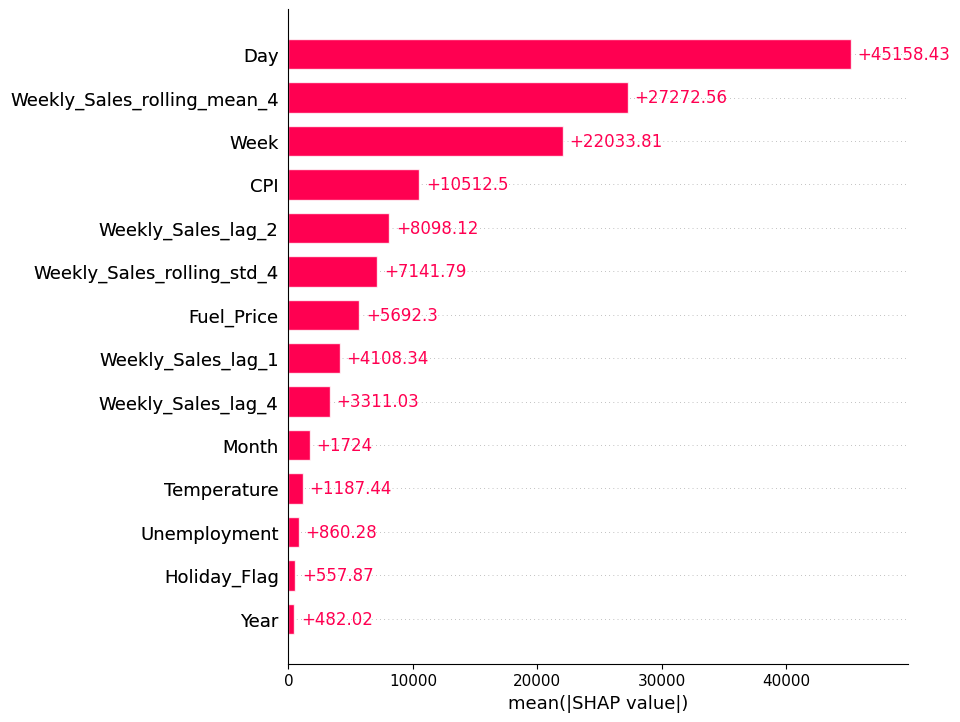

In [ ]:
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, max_display=15)  # Top 15 features
# plt.title("Global Feature Importance (SHAP Values)")
plt.show()

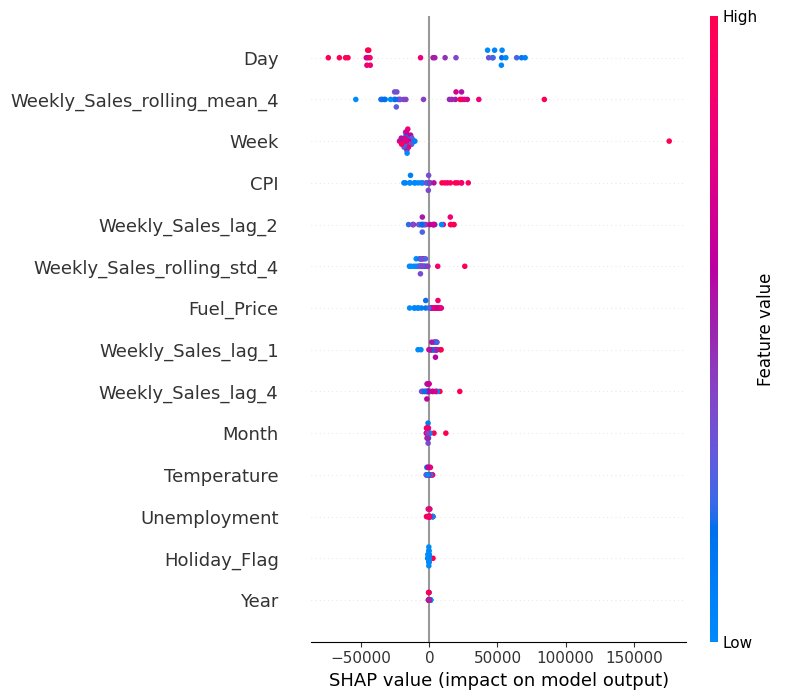

In [ ]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=selected_features)
# plt.title("SHAP Summary Plot")
# plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

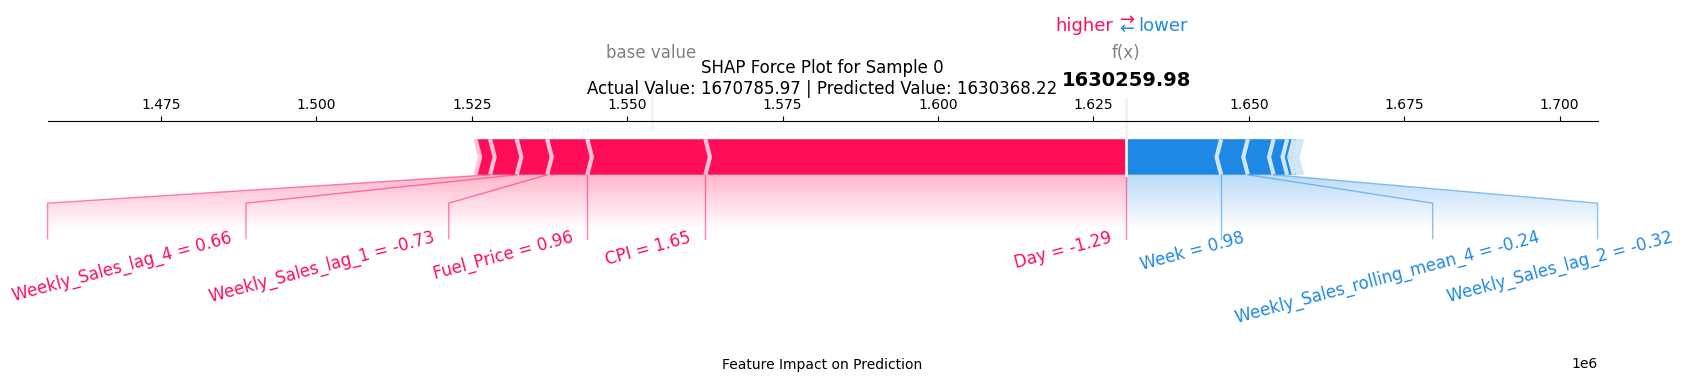

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

# For a single prediction (e.g., first test sample)
sample_idx = 0  # You can change this to any index you want to analyze

# Create the force plot with improved formatting
plt.figure(figsize=(12, 6))
shap.force_plot(
    base_value=np.round(explainer.expected_value, 2),  # Model's average prediction
    shap_values=np.round(shap_values.values[sample_idx], 2),  # SHAP values for this sample
    features=np.round(X_test_scaled[sample_idx], 2),  # Feature values for this sample
    feature_names=selected_features,  # Your feature names
    matplotlib=True,  # Use matplotlib instead of Javascript
    show=False,  # Don't show immediately (let us customize first)
    text_rotation=15,  # Rotate feature names for better readability
    contribution_threshold=0.05  # Only show features contributing >5% to prediction
)

# Customize the plot
plt.title(f"SHAP Force Plot for Sample {sample_idx}\n"
          f"Actual Value: {y_test.iloc[sample_idx]:.2f} | "
          f"Predicted Value: {model.predict(X_test_scaled[sample_idx:sample_idx+1])[0]:.2f}",
          fontsize=12, pad=20)
plt.xlabel("Feature Impact on Prediction", fontsize=10)
# plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
# XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train_scaled, y_train)

best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("\nXGBoost Results:")
print(f"Best Parameters: {xgb_grid.best_params_}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb)}")


XGBoost Results:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
RMSE: 139274.4593580029
R2 Score: 0.4746505048469284


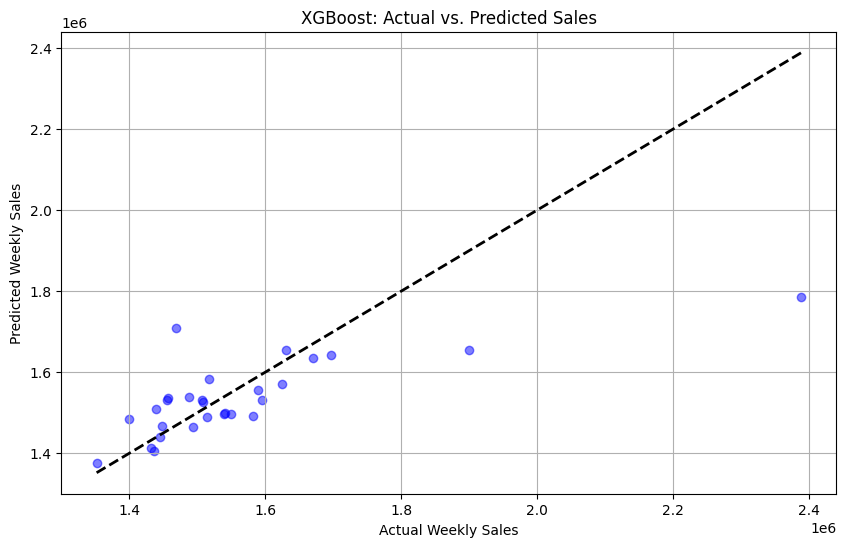

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('XGBoost: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

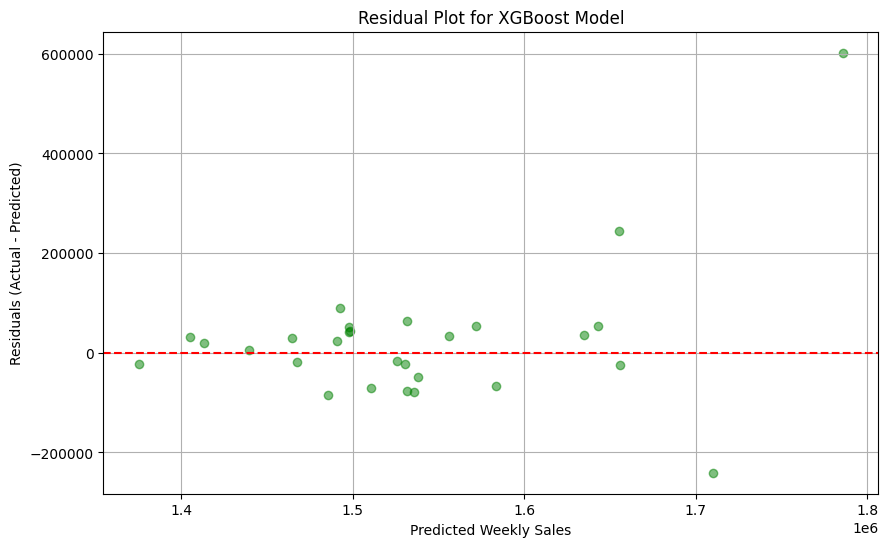

In [ ]:

plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_xgb
plt.scatter(y_pred_xgb, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for XGBoost Model')
plt.grid(True)
plt.show()

In [ ]:
import shap

# Load your trained XGBoost model
model = best_xgb

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train_scaled)  # Use scaled training data

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Optional: For faster results, use a subset of data
# shap_values = explainer(X_test_scaled[:100])  # First 100 samples

In [ ]:
shap_values.feature_names = selected_features

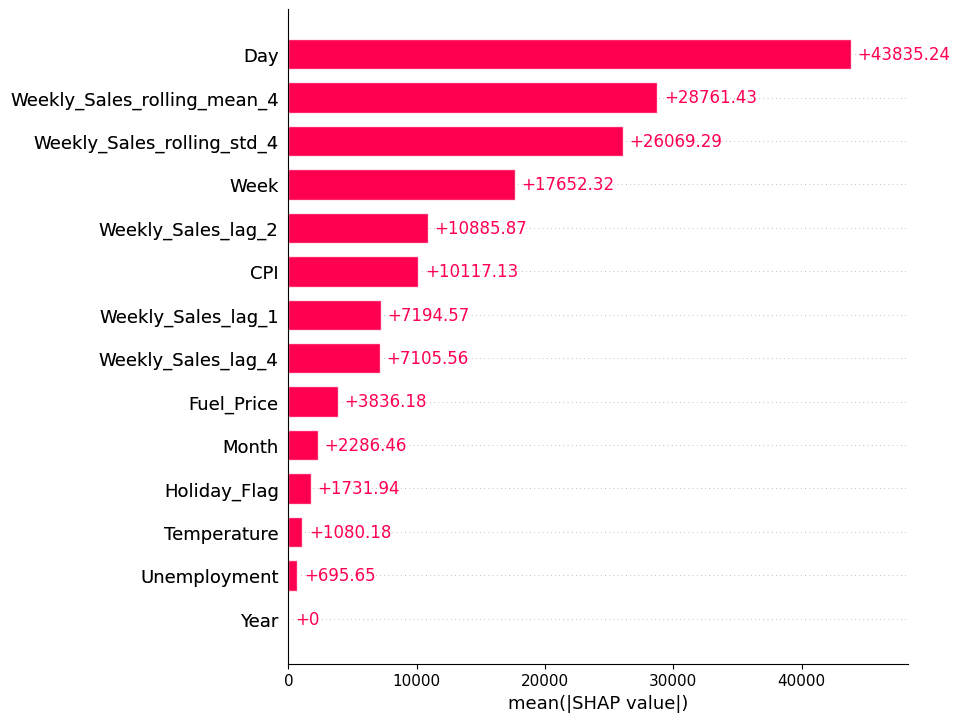

In [ ]:
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, max_display=15)  # Top 15 features
# plt.title("Global Feature Importance (SHAP Values)")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=selected_features)
# plt.title("SHAP Summary Plot")
# plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

# For a single prediction (e.g., first test sample)
sample_idx = 0  # You can change this to any index you want to analyze

# Create the force plot with improved formatting
plt.figure(figsize=(12, 6))
shap.force_plot(
    base_value=np.round(explainer.expected_value, 2),  # Model's average prediction
    shap_values=np.round(shap_values.values[sample_idx], 2),  # SHAP values for this sample
    features=np.round(X_test_scaled[sample_idx], 2),  # Feature values for this sample
    feature_names=selected_features,  # Your feature names
    matplotlib=True,  # Use matplotlib instead of Javascript
    show=False,  # Don't show immediately (let us customize first)
    text_rotation=15,  # Rotate feature names for better readability
    contribution_threshold=0.05  # Only show features contributing >5% to prediction
)

# Customize the plot
plt.title(f"SHAP Force Plot for Sample {sample_idx}\n"
          f"Actual Value: {y_test.iloc[sample_idx]:.2f} | "
          f"Predicted Value: {model.predict(X_test_scaled[sample_idx:sample_idx+1])[0]:.2f}",
          fontsize=12, pad=20)
plt.xlabel("Feature Impact on Prediction", fontsize=10)
# plt.tight_layout()  # Prevent label cutoff
plt.show()

<Figure size 1200x600 with 0 Axes>

In [ ]:
# AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

ada = AdaBoostRegressor(random_state=42)
ada_grid = GridSearchCV(ada, ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_grid.fit(X_train_scaled, y_train)

best_ada = ada_grid.best_estimator_
y_pred_ada = best_ada.predict(X_test_scaled)

print("\nAdaBoost Results:")
print(f"Best Parameters: {ada_grid.best_params_}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ada))}")
print(f"R2 Score: {r2_score(y_test, y_pred_ada)}")


AdaBoost Results:
Best Parameters: {'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 50}
RMSE: 94560.33481278062
R2 Score: 0.757828317410536


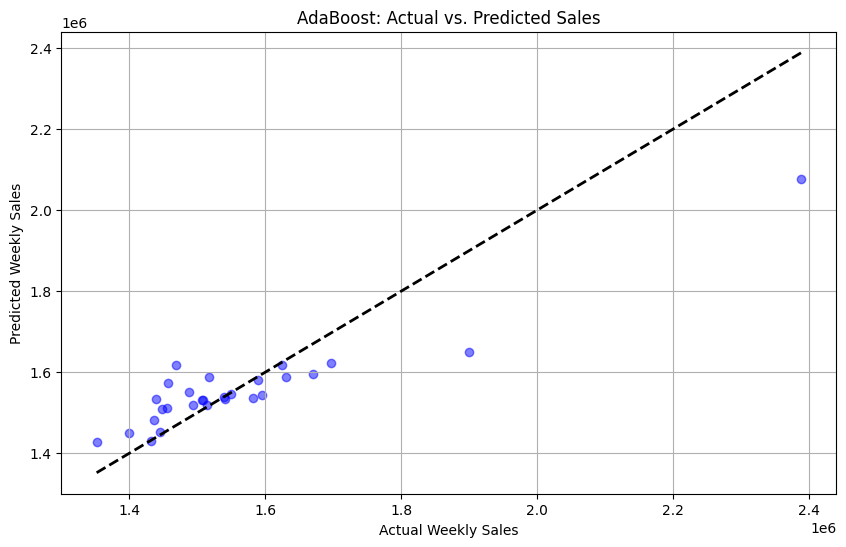

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ada, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('AdaBoost: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_ada
plt.scatter(y_pred_ada, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for AdaBoost Model')
plt.grid(True)
plt.show()

In [ ]:
# Gradient Boosting
gb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# best_parameters = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(X_train_scaled, y_train)

best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)

print("\nGradient Boosting Results:")
print(f"Best Parameters: {gb_grid.best_params_}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print(f"R2 Score: {r2_score(y_test, y_pred_gb)}")


Gradient Boosting Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
RMSE: 109541.6166230271
R2 Score: 0.6750147511658255


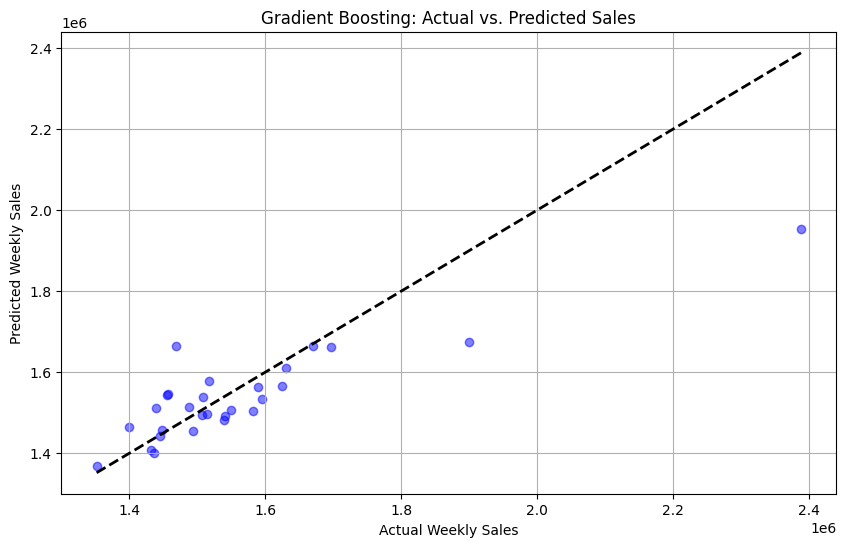

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Gradient Boosting: Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

In [ ]:


plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_gb
plt.scatter(y_pred_gb, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Gradient Boosting Model')
plt.grid(True)
plt.show()

In [ ]:
import shap

model = best_gb

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train_scaled)  # Use scaled training data

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Optional: For faster results, use a subset of data
# shap_values = explainer(X_test_scaled[:100])  # First 100 samples

In [ ]:
shap_values.feature_names = selected_features

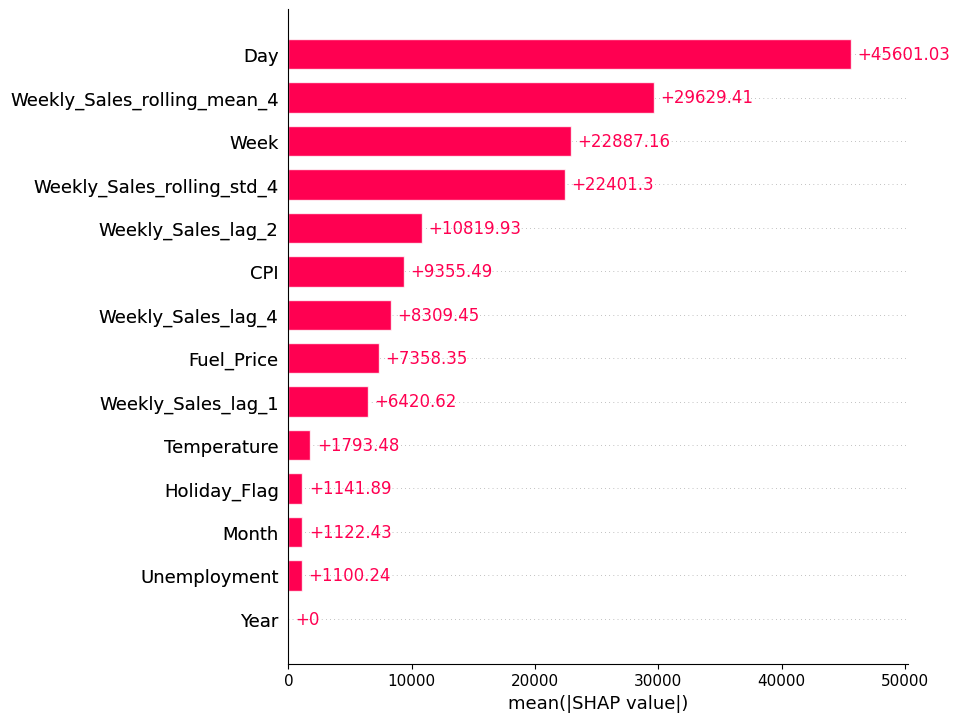

In [ ]:
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, max_display=15)  # Top 15 features
# plt.title("Global Feature Importance (SHAP Values)")
plt.show()

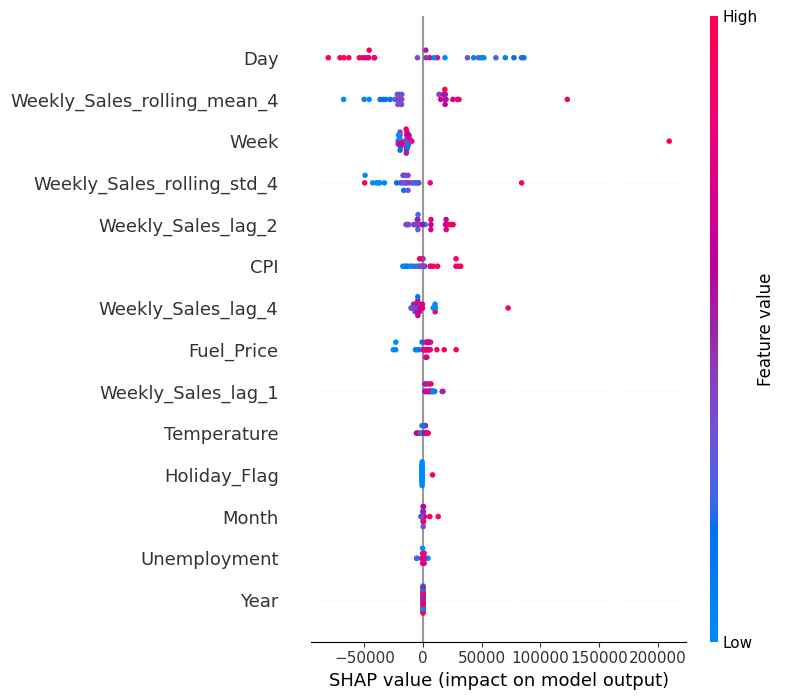

In [ ]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=selected_features)
# plt.title("SHAP Summary Plot")
# plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

# For a single prediction (e.g., first test sample)
sample_idx = 0  # You can change this to any index you want to analyze

# Create the force plot with improved formatting
plt.figure(figsize=(12, 6))
shap.force_plot(
    base_value=np.round(explainer.expected_value, 2),  # Model's average prediction
    shap_values=np.round(shap_values.values[sample_idx], 2),  # SHAP values for this sample
    features=np.round(X_test_scaled[sample_idx], 2),  # Feature values for this sample
    feature_names=selected_features,  # Your feature names
    matplotlib=True,  # Use matplotlib instead of Javascript
    show=False,  # Don't show immediately (let us customize first)
    text_rotation=15,  # Rotate feature names for better readability
    contribution_threshold=0.05  # Only show features contributing >5% to prediction
)

# Customize the plot
plt.title(f"SHAP Force Plot for Sample {sample_idx}\n"
          f"Actual Value: {y_test.iloc[sample_idx]:.2f} | "
          f"Predicted Value: {model.predict(X_test_scaled[sample_idx:sample_idx+1])[0]:.2f}",
          fontsize=12, pad=20)
plt.xlabel("Feature Impact on Prediction", fontsize=10)
# plt.tight_layout()  # Prevent label cutoff
plt.show()

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Collect all model results
models = {
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'AdaBoost': best_ada,
    'Gradient Boosting': best_gb,
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
results_df.sort_values('RMSE')


Model Comparison:


Model           RMSE  R2 Score
2           AdaBoost   94560.334813  0.757828
3  Gradient Boosting  109541.616623  0.675015
0      Random Forest  123038.272555  0.589998
1            XGBoost  139274.459358  0.474651

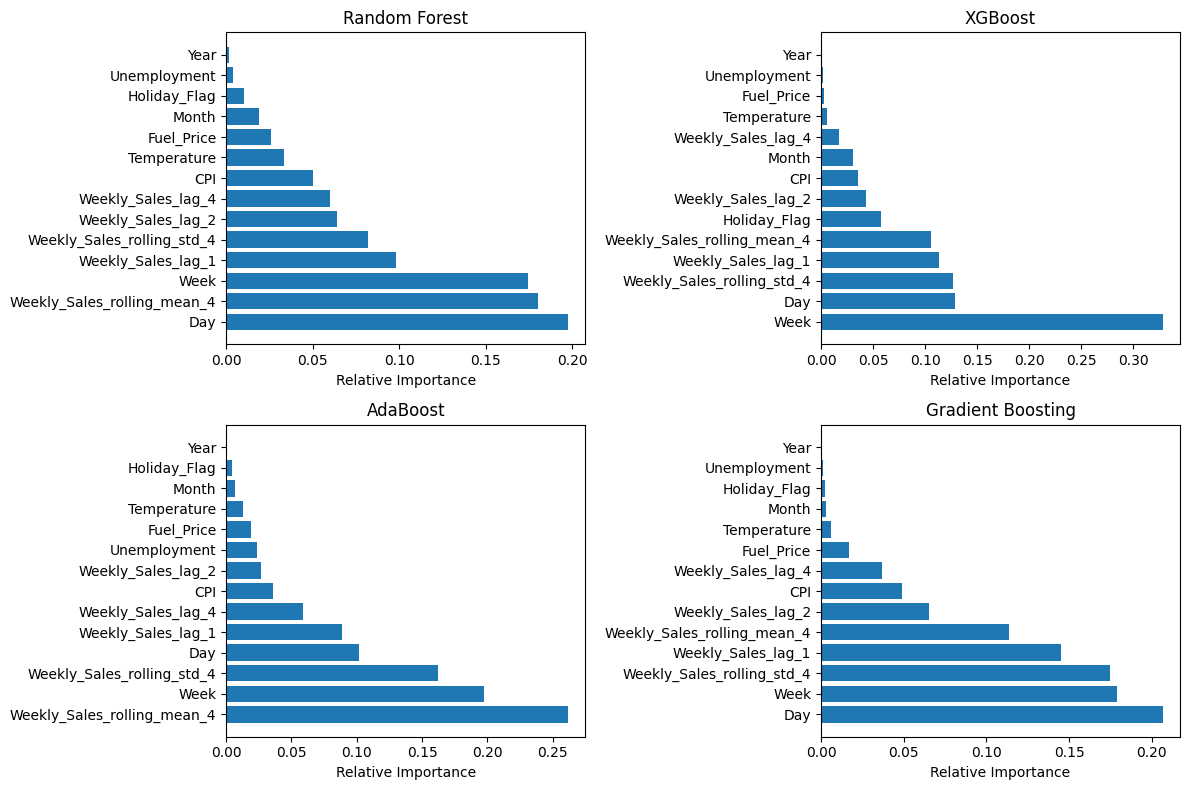

In [ ]:
# Plot feature importance for tree-based models
plt.figure(figsize=(12, 8))
for i, (name, model) in enumerate(models.items()):
    if hasattr(model, 'feature_importances_'):
        plt.subplot(2, 2, i+1)
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.title(name)
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [selected_features[i] for i in indices])
        plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

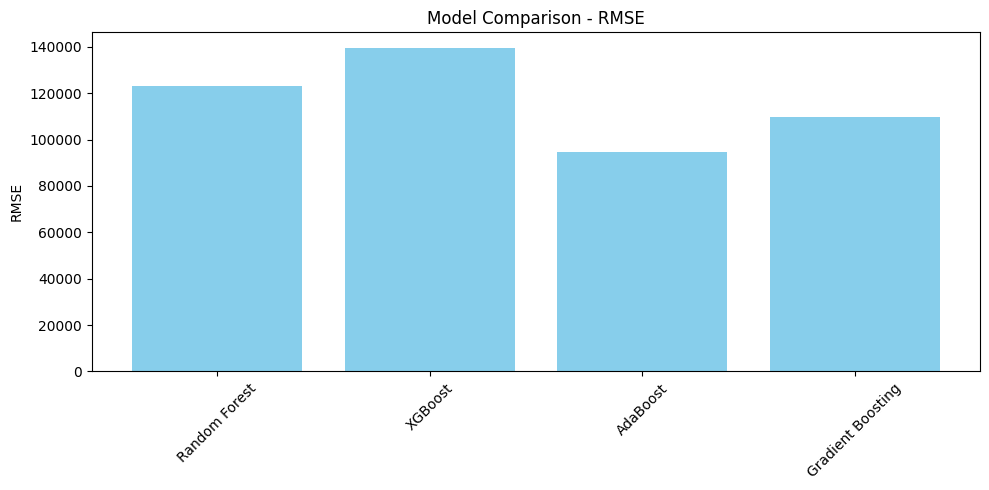

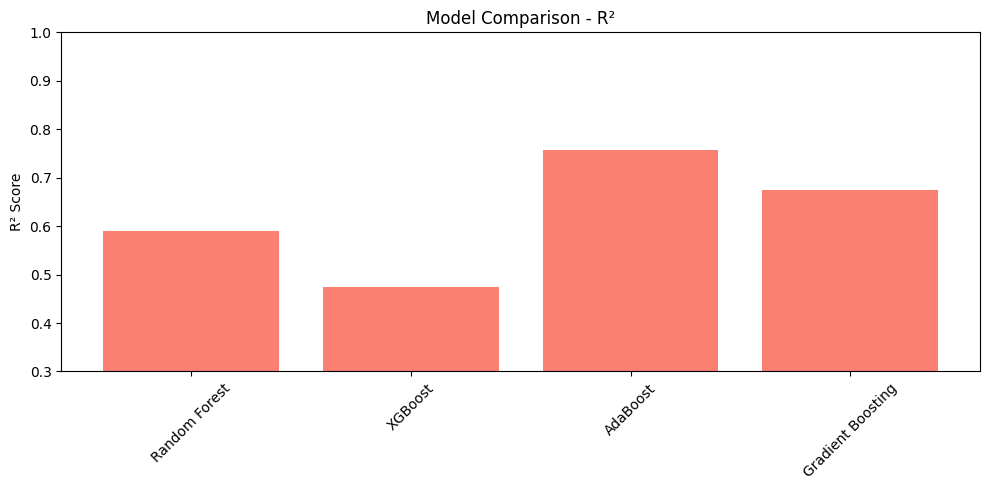

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting']

# Metrics
rmse_values = [
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    np.sqrt(mean_squared_error(y_test, y_pred_ada)),
    np.sqrt(mean_squared_error(y_test, y_pred_gb))
]

r2_values = [
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_xgb),
    r2_score(y_test, y_pred_ada),
    r2_score(y_test, y_pred_gb)
]

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color='skyblue')
plt.ylabel('RMSE')
plt.title('Model Comparison - RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color='salmon')
plt.ylabel('R² Score')
plt.title('Model Comparison - R²')
plt.xticks(rotation=45)
plt.ylim(0.3, 1)  # R² typically between 0 and 1
plt.tight_layout()
plt.show()


In [ ]:
import joblib
import os

# Create a directory to store models if it doesn't exist
output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)


# Dictionary of all trained models
models = {
    'RandomForest': best_rf,
    'XGBoost': best_xgb,
    'AdaBoost': best_ada,
    'GradientBoosting': best_gb,
}

# Save each model and its scaler
for model_name, model in models.items():
    # Save the model
    joblib.dump(model, f'{output_dir}/{model_name}_model_subset.pkl')

    # Save the scaler (same scaler for all models in this case)
    joblib.dump(scaler, f'{output_dir}/{model_name}_scaler_subset.pkl')

    print(f"Saved {model_name} model and scaler.")


Saved RandomForest model and scaler.
Saved XGBoost model and scaler.
Saved AdaBoost model and scaler.
Saved GradientBoosting model and scaler.


In [ ]:
# Example: Load and use a specific model (e.g., RandomForest)
loaded_model = joblib.load(f'{output_dir}/RandomForest_model_subset.pkl')
loaded_scaler = joblib.load(f'{output_dir}/RandomForest_scaler_subset.pkl')

# Sample prediction
sample_data = X_test.iloc[0:1]  # Get one sample
scaled_sample = loaded_scaler.transform(sample_data)
prediction = loaded_model.predict(scaled_sample)
print(f"\nRandomForest prediction: {prediction[0]}")
print(f"Actual value: {y_test.iloc[0]}")


RandomForest prediction: 1630368.2227140476
Actual value: 1670785.97


In [ ]:
import joblib
import os
import pandas as pd

# Define output directory
output_dir = "saved_models"

# Load the trained model and scaler
loaded_model = joblib.load(os.path.join(output_dir, 'RandomForest_model_subset.pkl'))
loaded_scaler = joblib.load(os.path.join(output_dir, 'RandomForest_scaler_subset.pkl'))

# Ensure X_test and y_test are defined
if 'X_test' not in locals() or 'y_test' not in locals():
    raise ValueError("X_test and y_test must be defined before running this script.")

# Select sample data
sample_data = X_test.iloc[:100]  # Select first 100 samples
scaled_sample = loaded_scaler.transform(sample_data)

# Make predictions
predictions = loaded_model.predict(scaled_sample)

# Create DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test.iloc[:100].values.flatten(),
    'Predicted': predictions.flatten()
})

# Display the DataFrame
results_df[:40]


Actual     Predicted
0   1670785.97  1.630368e+06
1   1588948.32  1.563140e+06
2   1508239.93  1.549069e+06
3   1697230.96  1.638269e+06
4   2387950.20  1.841559e+06
5   1432069.95  1.403533e+06
6   1456800.28  1.543506e+06
7   1438830.15  1.507845e+06
8   1631135.79  1.618121e+06
9   1541102.38  1.513792e+06
10  1468928.37  1.592393e+06
11  1582083.40  1.540274e+06
12  1514259.78  1.503492e+06
13  1448938.92  1.472867e+06
14  1445249.09  1.442410e+06
15  1488538.09  1.571109e+06
16  1399662.07  1.465167e+06
17  1507460.69  1.518694e+06
18  1437059.26  1.446068e+06
19  1899676.88  1.653120e+06
20  1494479.49  1.512672e+06
21  1624477.58  1.633107e+06
22  1550229.22  1.557944e+06
23  1594968.28  1.532941e+06
24  1352219.79  1.374602e+06
25  1540163.53  1.508655e+06
26  1517428.87  1.591707e+06
27  1455090.69  1.507633e+06

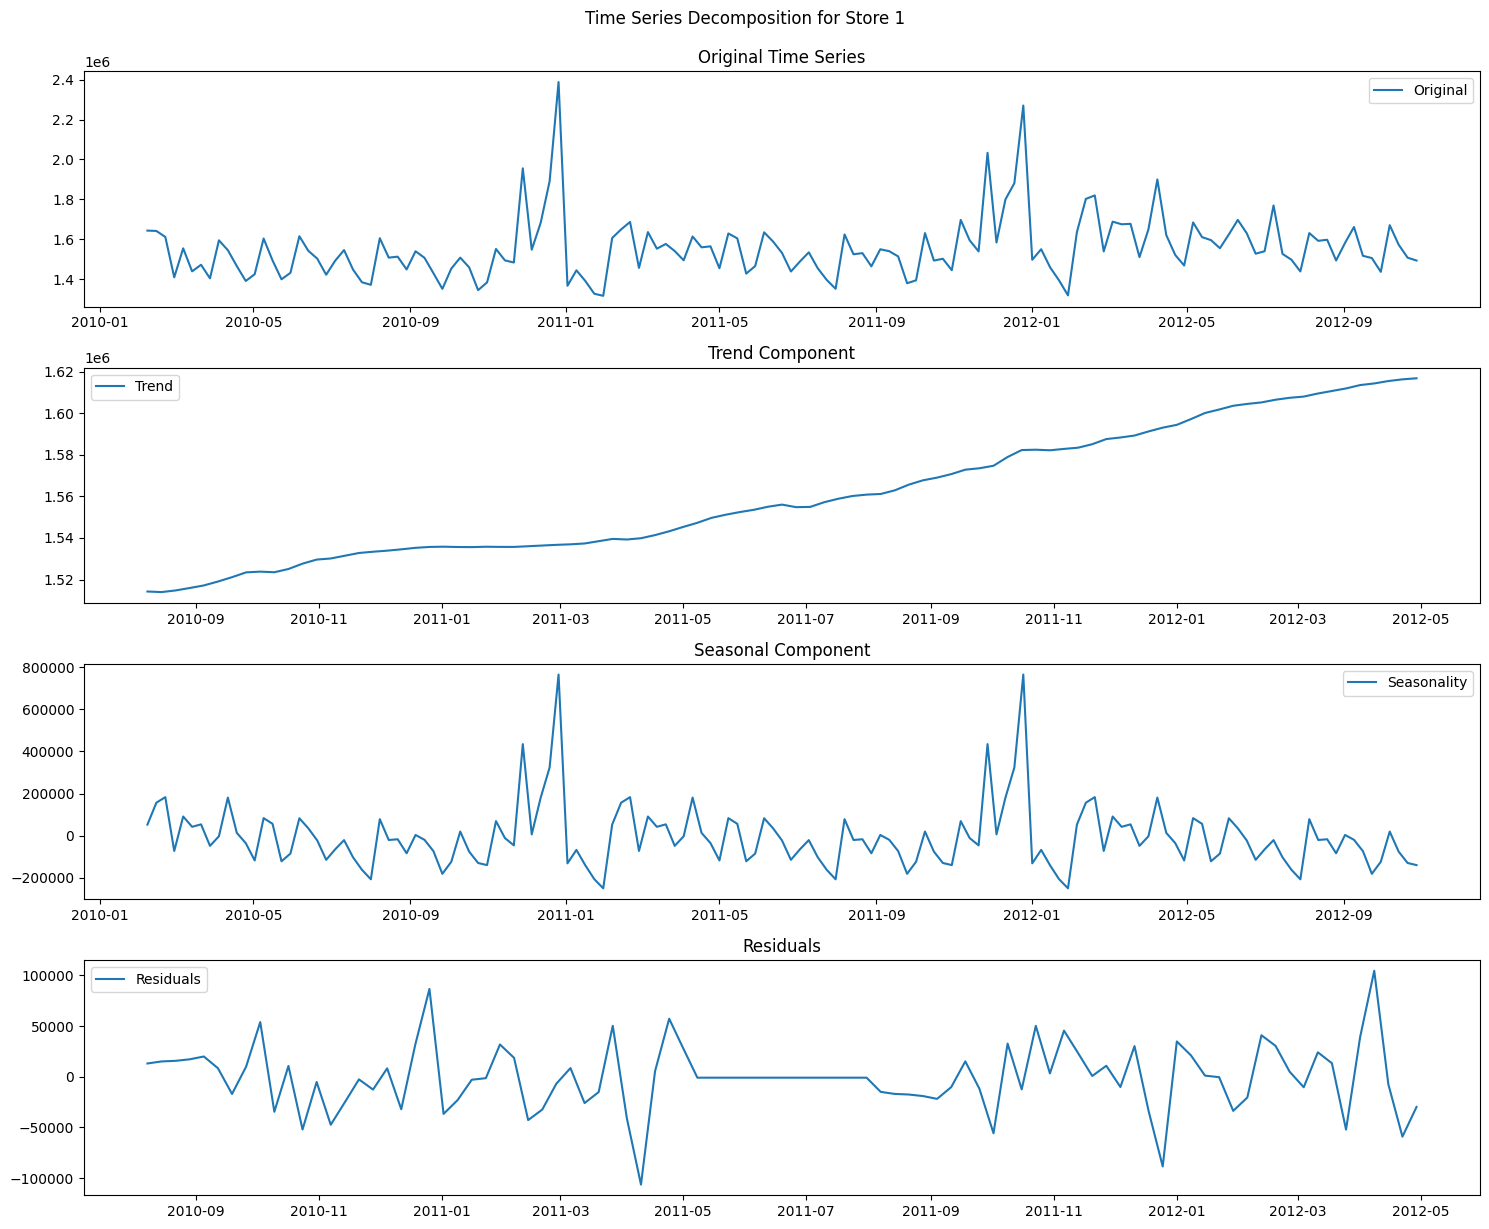

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

def plot_ts_decomposition(store_id):
    store_data = data[data['Store'] == store_id].set_index('Date').sort_index()
    store_weekly = store_data['Weekly_Sales'].resample('W').mean()

    # Decompose the time series
    decomposition = seasonal_decompose(store_weekly, model='additive', period=52)

    # Plot decomposition
    plt.figure(figsize=(15, 12))

    plt.subplot(4, 1, 1)
    plt.plot(store_weekly, label='Original')
    plt.legend(loc='best')
    plt.title('Original Time Series')

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend Component')

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.title('Seasonal Component')

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='best')
    plt.title('Residuals')

    plt.tight_layout()
    plt.suptitle(f'Time Series Decomposition for Store {store_id}', y=1.02)
    plt.show()

# Plot for a sample store (you can change the store ID)
plot_ts_decomposition(1)

In [ ]:
# Convert 'Date' to datetime if not already done
data['Date'] = pd.to_datetime(data['Date'])

# Extract week number and store in 'Week' column
data['Week'] = data['Date'].dt.isocalendar().week

## Time Series Analysis
Objective: Analyze the time series properties (trend, seasonality, residuals) using seasonal decomposition.



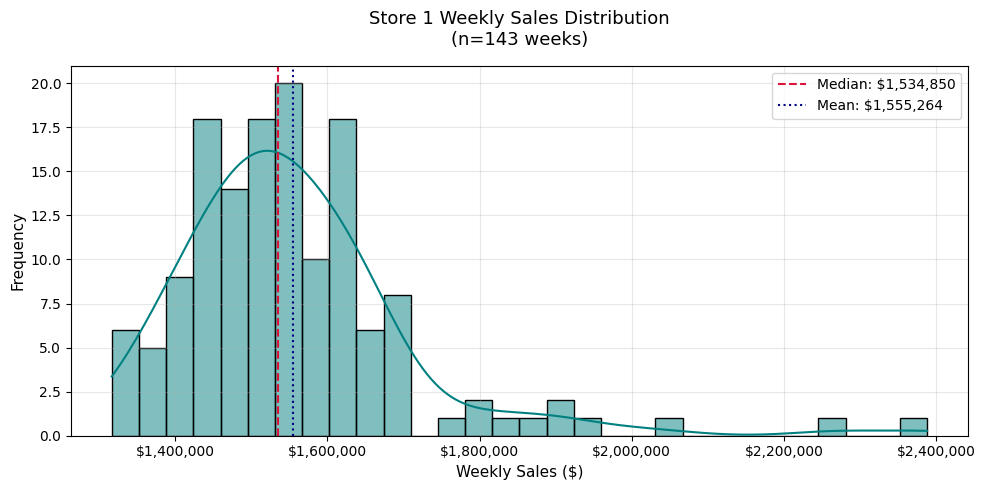

In [ ]:
def plot_individual_store_distributions(data, stores=None, bins=30, figsize=(10, 5)):
    """
    Plot individual distribution plots for each store

    Parameters:
    - data: DataFrame containing the sales data
    - stores: List of store IDs to analyze (if None, plots all stores)
    - bins: Number of bins for histogram
    - figsize: Size of each individual plot
    """
    # Get stores to plot (all stores if None specified)
    if stores is None:
        stores = sorted(data['Store'].unique())

    for store in stores:
        # Filter data for the current store
        store_data = data[data['Store'] == store]

        # Create figure
        plt.figure(figsize=figsize)

        # Create distribution plot
        sns.histplot(data=store_data, x='Weekly_Sales',
                     color='teal', kde=True, bins=bins)

        # Add median line
        median_val = store_data['Weekly_Sales'].median()
        plt.axvline(median_val, color='crimson', linestyle='--',
                    linewidth=1.5, label=f'Median: ${median_val:,.0f}')

        # Add mean line
        mean_val = store_data['Weekly_Sales'].mean()
        plt.axvline(mean_val, color='navy', linestyle=':',
                    linewidth=1.5, label=f'Mean: ${mean_val:,.0f}')

        # Formatting
        plt.title(f'Store {store} Weekly Sales Distribution\n'
                 f'(n={len(store_data)} weeks)', fontsize=13, pad=15)
        plt.xlabel('Weekly Sales ($)', fontsize=11)
        plt.ylabel('Frequency', fontsize=11)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Format x-axis with dollar signs
        plt.gca().xaxis.set_major_formatter('${x:,.0f}')

        plt.tight_layout()
        plt.show()

# Example usage for all stores:
# plot_individual_store_distributions(data)

# Example usage for specific stores:
plot_individual_store_distributions(data, stores=[1])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def analyze_aggregate_seasonality(data, period=52, model='additive'):
    """
    Perform seasonal decomposition on aggregated sales data across all stores

    Parameters:
    - data: DataFrame containing the sales data
    - period: Seasonality period (default: 52 weeks for annual seasonality)
    - model: 'additive' or 'multiplicative' decomposition model
    """
    # Aggregate sales by date across all stores
    agg_data = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

    # Check if we have enough data points
    if len(agg_data) < 2 * period:
        print(f"Insufficient data ({len(agg_data)} points) for {period}-week seasonality")
        return

    try:
        # Perform seasonal decomposition
        decomposition = seasonal_decompose(agg_data.set_index('Date')['Weekly_Sales'],
                                         model=model,
                                         period=period,
                                         extrapolate_trend='freq')

        # Create figure with 4 subplots
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12))
        fig.suptitle(f'Aggregate Seasonal Decomposition Across All Stores\n'
                    f'({model.capitalize()} Model, {period}-week period)',
                    fontsize=16, y=1.02)

        # Plot observed
        ax1.plot(decomposition.observed, color='navy')
        ax1.set_ylabel('Observed Sales ($)', fontsize=12)
        ax1.grid(alpha=0.3)
        ax1.yaxis.set_major_formatter('${x:,.0f}')

        # Plot trend
        ax2.plot(decomposition.trend, color='darkgreen')
        ax2.set_ylabel('Trend ($)', fontsize=12)
        ax2.grid(alpha=0.3)
        ax2.yaxis.set_major_formatter('${x:,.0f}')

        # Plot seasonal
        ax3.plot(decomposition.seasonal, color='purple')
        ax3.set_ylabel('Seasonal Component ($)', fontsize=12)
        ax3.grid(alpha=0.3)
        ax3.yaxis.set_major_formatter('${x:,.0f}')

        # Plot residual
        ax4.scatter(decomposition.resid.index, decomposition.resid,
                   s=15, alpha=0.6, color='maroon')
        ax4.axhline(0, color='red', linestyle='--', alpha=0.5)
        ax4.set_ylabel('Residuals ($)', fontsize=12)
        ax4.grid(alpha=0.3)
        ax4.yaxis.set_major_formatter('${x:,.0f}')

        # Format x-axis
        for ax in [ax1, ax2, ax3, ax4]:
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

        plt.tight_layout()
        plt.show()

        # Print summary statistics
        print("\nAggregate Seasonality Analysis:")
        print(f"- Total observed sales: ${decomposition.observed.sum():,.0f}")
        print(f"- Average weekly sales: ${decomposition.observed.mean():,.0f}")
        print(f"- Trend range: ${decomposition.trend.min():,.0f} to ${decomposition.trend.max():,.0f}")
        print(f"- Seasonal amplitude: ${decomposition.seasonal.max() - decomposition.seasonal.min():,.0f}")
        print(f"- Residual stats: mean={decomposition.resid.mean():.2f}, std={decomposition.resid.std():.2f}")

    except Exception as e:
        print(f"Error processing aggregate data: {str(e)}")

# Example usage:
analyze_aggregate_seasonality(data)


Aggregate Seasonality Analysis:
- Total observed sales: $6,737,218,987
- Average weekly sales: $47,113,419
- Trend range: $46,739,591 to $48,737,768
- Seasonal amplitude: $39,269,748
- Residual stats: mean=28612.22, std=1056948.57


## Model Selection and Forecasting Approach

## Prophet Model for Forcasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Aggregate weekly sales across stores
weekly_data = data.groupby('Date').agg({
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

# Sort by date
weekly_data = weekly_data.sort_values('Date')

# Calculate the split point (80% train, 20% test)
split_point = int(len(weekly_data) * 0.85)
train_data = weekly_data[:split_point]
test_data = weekly_data[split_point:]

print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

# Prepare data for Prophet
prophet_data = weekly_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})
prophet_data_train = prophet_data[:split_point]
prophet_data_test = prophet_data[split_point:]

# Train Prophet model
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_prophet.add_regressor('Temperature')
model_prophet.add_regressor('Fuel_Price')
model_prophet.add_regressor('CPI')
model_prophet.add_regressor('Unemployment')
model_prophet.fit(prophet_data_train)

# 1. Make predictions on test set
future_test = prophet_data_test[['ds', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
forecast_test = model_prophet.predict(future_test)

# Calculate metrics
mae_prophet = mean_absolute_error(prophet_data_test['y'], forecast_test['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(prophet_data_test['y'], forecast_test['yhat']))
r2_prophet = r2_score(prophet_data_test['y'], forecast_test['yhat'])
mse_prophet = mean_squared_error(prophet_data_test['y'], forecast_test['yhat'])

prophet_metrics = {'MAE': mae_prophet, 'MSE': mse_prophet, 'RMSE': rmse_prophet, 'R2': r2_prophet}

print("\nProphet Model Metrics (Test Set):")
print(f"MAE: ${mae_prophet:,.2f}")
print(f"RMSE: ${rmse_prophet:,.2f}")
print(f"R2 Score: {r2_prophet:.4f}")
print(f"MSE: {mse_prophet:.4f}")



# Plot test predictions


plt.figure(figsize=(15, 7))
plt.plot(prophet_data_train['ds'], prophet_data_train['y'], label='Training Data')
plt.plot(prophet_data_test['ds'], prophet_data_test['y'], label='Actual Test Data')
plt.plot(prophet_data_test['ds'], forecast_test['yhat'], label='Prophet Predicted', color='red')
plt.fill_between(prophet_data_test['ds'],
                forecast_test['yhat_lower'],
                forecast_test['yhat_upper'],
                color='red',
                alpha=0.1)
plt.title('Prophet Model: Actual vs Predicted Weekly Sales (All Stores)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Create future forecast (next 52 weeks)
future_periods = 52
last_date = prophet_data['ds'].max()

# Create future dataframe
future_dates = pd.date_range(
    start=last_date + pd.Timedelta(weeks=1),
    periods=future_periods,
    freq='W'
)
future_df = pd.DataFrame({'ds': future_dates})

# For exogenous regressors, we'll carry forward the last known values
last_vals = prophet_data.iloc[-1][['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    future_df[col] = last_vals[col]

# Make future forecast
future_forecast = model_prophet.predict(future_df)

# Plot historical data with future forecast
plt.figure(figsize=(15, 7))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Sales')
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Future Forecast', color='red')
plt.fill_between(
    future_forecast['ds'],
    future_forecast['yhat_lower'],
    future_forecast['yhat_upper'],
    color='pink',
    alpha=0.3,
    label='Uncertainty Interval'
)
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.title(f'Sales Forecast for Next {future_periods} Weeks for Prophet Model')

plt.legend()
plt.tight_layout()
plt.show()

# 3. Plot forecast components
fig = model_prophet.plot_components(future_forecast)
plt.tight_layout()
plt.show()

05:33:53 - cmdstanpy - INFO - Chain [1] start processing
05:33:53 - cmdstanpy - INFO - Chain [1] done processing


Training set size: 121
Test set size: 22

Prophet Model Metrics (Test Set):
MAE: $28,292.62
RMSE: $36,291.20
R2 Score: 0.2000
MSE: 1317051495.0315


## SARIMAX,ARIMA and Halt-Winter Models for Forcasting on Weekly Sales

Training SARIMAX model...
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  121
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -172.365
Date:                            Sat, 05 Apr 2025   AIC                            362.729
Time:                                    05:34:47   BIC                            368.481
Sample:                                02-05-2010   HQIC                           362.197
                                     - 05-25-2012                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
temp         -4235.1167   2.51e+04     -0.169      0.866   -5.34e+04    4.49e+04
fue

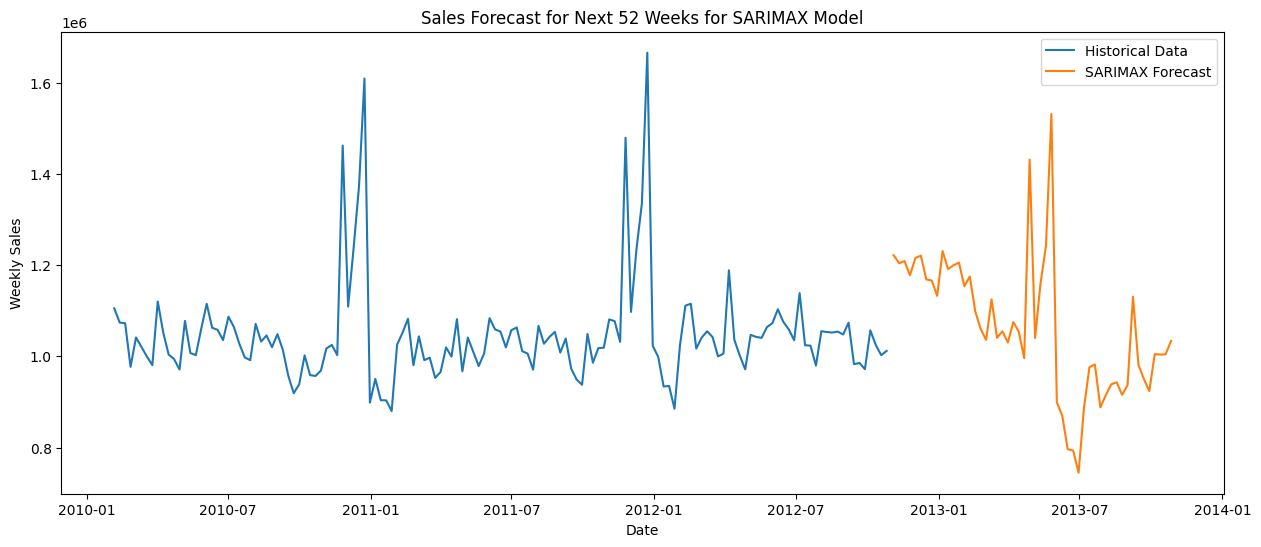


Training ARIMA model...
                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  121
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -828.599
Date:                          Sat, 05 Apr 2025   AIC                           1667.198
Time:                                  05:35:14   BIC                           1678.295
Sample:                              02-05-2010   HQIC                          1671.595
                                   - 05-25-2012                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3019      0.769      0.393      0.695      -1.205       1.809
ma.L1         -0.4118     

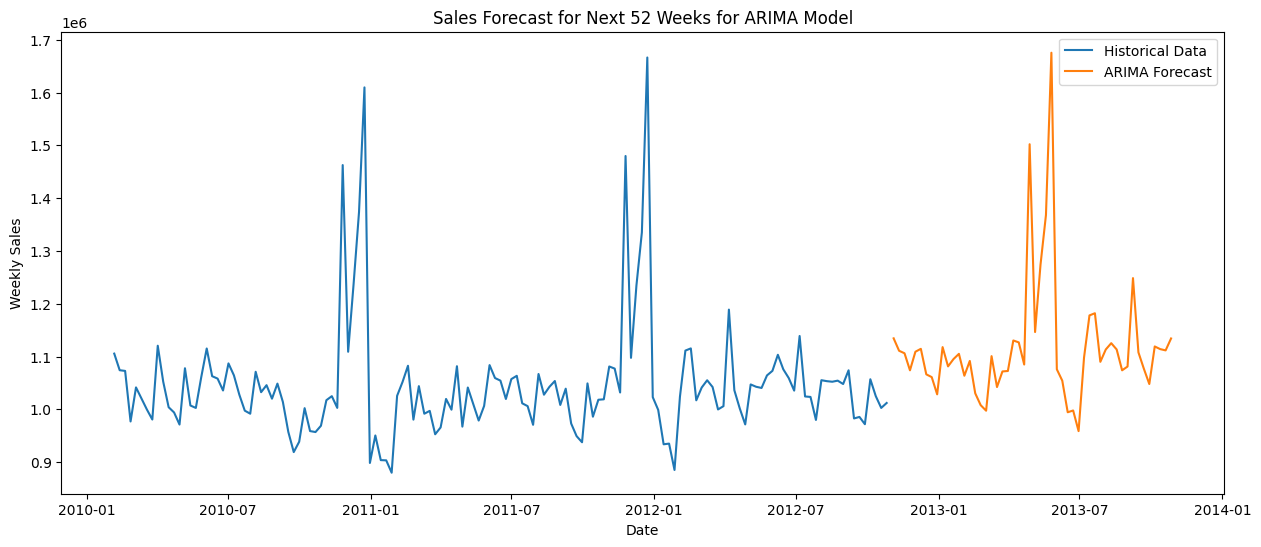


Training Holt-Winters model...
Holt-Winters model fitted
Holt-Winters Metrics:
MAE: 22682.18
MSE: 776133558.99
RMSE: 27859.17
R2 Score: 0.53




Model Comparison:


MAE           MSE          RMSE        R2
SARIMAX       36491.639758  1.969451e+09  44378.493286 -0.196212
ARIMA         38357.973060  1.830648e+09  42786.071404 -0.111905
Holt-Winters  22682.176120  7.761336e+08  27859.173695  0.528589
Prophet       28292.618528  1.317051e+09  36291.204100  0.200045

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from prophet import Prophet
scaler = RobustScaler()
data['Weekly_Sales_Scaled'] = scaler.fit_transform(data[['Weekly_Sales']])
df_clean = data[abs(data['Weekly_Sales_Scaled']) < 3].copy()

# Create rolling average features for external regressors
# We compute the rolling mean for a window of 4 weeks per store
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    df_clean[col + '_MA'] = df_clean.groupby('Store')[col].transform(lambda x: x.rolling(window=4, min_periods=1).mean())

# Prepare Prophet dataframe using aggregated sales
prophet_df = df_clean.groupby('Date').agg({
    'Weekly_Sales': 'mean',
    'Temperature_MA': 'mean',
    'Fuel_Price_MA': 'mean',
    'CPI_MA': 'mean',
    'Unemployment_MA': 'mean'
}).reset_index()

prophet_df.rename(columns={
    'Date': 'ds',
    'Weekly_Sales': 'y',
    'Temperature_MA': 'temp',
    'Fuel_Price_MA': 'fuel_price',
    'CPI_MA': 'cpi',
    'Unemployment_MA': 'unemployment'
}, inplace=True)


# Prepare the data (using the same preprocessing as Prophet)
# Assuming prophet_df is already prepared from the previous code
ts_data = prophet_df.set_index('ds')

# Split into train and test (last 12 weeks for testing)
train_size = int(len(ts_data) * 0.85)
train, test = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print()

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Function to plot results
def plot_results(train, test, model_name, test_pred=None):
    plt.figure(figsize=(15, 6))
    plt.plot(train.index, train['y'], label='Training Data')
    plt.plot(test.index, test['y'], label='Actual Test Data')

    if test_pred is not None:
        plt.plot(test.index, test_pred, label=f'{model_name} Predicted', color='red')

    # plt.plot(forecast.index, forecast, label='Forecast', color='red')
    plt.title(f'{model_name} Model: Actual vs Predicted Weekly Sales (All Stores)')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()

# 1. SARIMAX Model (with exogenous variables)
print("Training SARIMAX model...")
exog_vars = ['temp', 'fuel_price', 'cpi', 'unemployment']

#    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))

sarimax_model = SARIMAX(train['y'],
                        exog=train[exog_vars],
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 52),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_results = sarimax_model.fit(disp=False)
print(sarimax_results.summary())

# Predict on test set
sarimax_test_pred = sarimax_results.get_forecast(steps=len(test), exog=test[exog_vars]).predicted_mean
sarimax_metrics = evaluate_model(test['y'], sarimax_test_pred, "SARIMAX")

# Forecast future values (using last values of exog vars)
future_periods = 52
last_exog = ts_data[exog_vars].iloc[-1:].values
future_exog = np.tile(last_exog, (future_periods, 1))

sarimax_forecast = sarimax_results.get_forecast(steps=future_periods, exog=future_exog).predicted_mean
future_dates = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(weeks=1), periods=future_periods, freq='W')
sarimax_forecast = pd.Series(sarimax_forecast.values, index=future_dates)

# Plot results
plot_results(train, test, "SARIMAX", sarimax_test_pred)
# Plot all forecasts together
plt.figure(figsize=(15, 6))
plt.plot(ts_data.index, ts_data['y'], label='Historical Data')
plt.plot(sarimax_forecast.index, sarimax_forecast, label='SARIMAX Forecast')
plt.title(f'Sales Forecast for Next {future_periods} Weeks for SARIMAX Model')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# 2. ARIMA Model (without exogenous variables)
print("\nTraining ARIMA model...")
# arima_model = ARIMA(train['y'], order=(1, 1, 1))

# Option 1: Enhanced manual ARIMA configuration
arima_model = ARIMA(
        train['y'],
        order=(1, 1, 1),  # (p,d,q)
        seasonal_order=(1, 1, 1, 52),  # (P,D,Q,s)
        enforce_stationarity=True,
        enforce_invertibility=True
    )
arima_results = arima_model.fit()
print(arima_results.summary())

# Predict on test set
arima_test_pred = arima_results.get_forecast(steps=len(test)).predicted_mean
arima_metrics = evaluate_model(test['y'], arima_test_pred, "ARIMA")

# Forecast future values
arima_forecast = arima_results.get_forecast(steps=future_periods).predicted_mean
arima_forecast = pd.Series(arima_forecast.values, index=future_dates)

# Plot results
plot_results(train, test, "ARIMA", arima_test_pred)

plt.figure(figsize=(15, 6))
plt.plot(ts_data.index, ts_data['y'], label='Historical Data')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')
plt.title(f'Sales Forecast for Next {future_periods} Weeks for ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()
# 3. Holt-Winters Model
print("\nTraining Holt-Winters model...")
test_weeks=20
trend='additive'
seasonal='additive'
seasonal_periods=52
hw_model = ExponentialSmoothing(train['y'],
                                   trend=trend,
                                   seasonal=seasonal,
                                   seasonal_periods=seasonal_periods,
                                   initialization_method='estimated')

hw_results = hw_model.fit()
print("Holt-Winters model fitted")

# Predict on test set
hw_test_pred = hw_results.forecast(len(test))
hw_metrics = evaluate_model(test['y'], hw_test_pred, "Holt-Winters")

# Forecast future values
hw_forecast = hw_results.forecast(future_periods)
hw_forecast = pd.Series(hw_forecast.values, index=future_dates)

# Plot results
plot_results(train, test, "Holt-Winters", hw_test_pred)

plt.figure(figsize=(15, 6))
plt.plot(ts_data.index, ts_data['y'], label='Historical Data')
plt.plot(hw_forecast.index, hw_forecast, label='Holt-Winters Forecast')
# plt.plot(future_forecast.index, future_forecast, label='Holt-Winters Forecast')
plt.title(f'Sales Forecast for Next {future_periods} Weeks for Holt-Winters Model')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Compare all models
metrics_df = pd.DataFrame({
    'SARIMAX': sarimax_metrics,
    'ARIMA': arima_metrics,
    'Holt-Winters': hw_metrics,
    "Prophet": prophet_metrics
}).T

print("\nModel Comparison:")
metrics_df


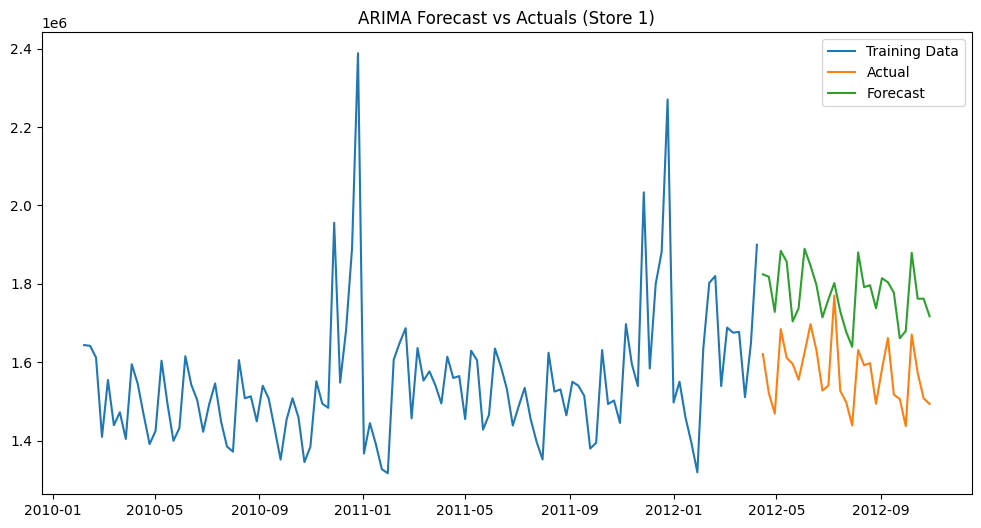

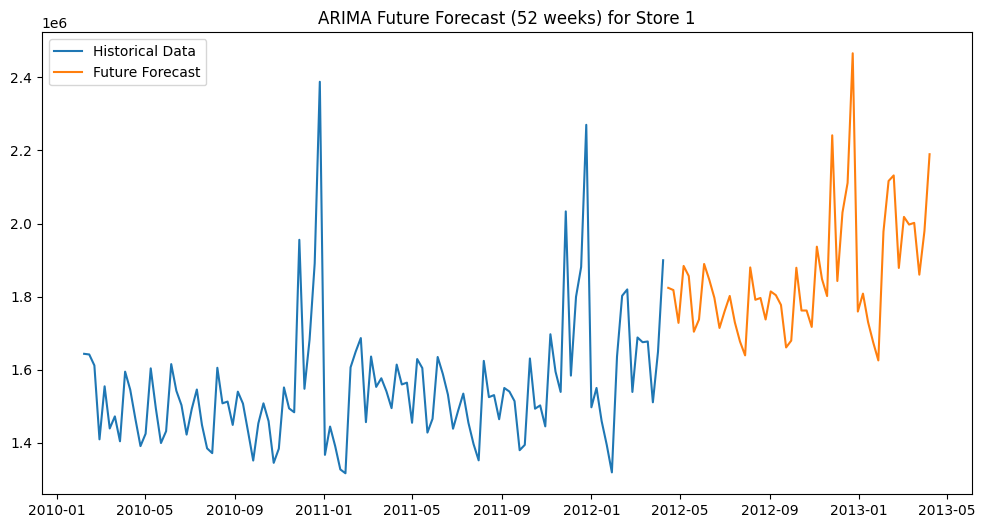

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28515D+00    |proj g|=  1.89448D+00

At iterate    5    f=  6.78106D+00    |proj g|=  1.50808D-02

At iterate   10    f=  6.77818D+00    |proj g|=  1.27914D-01

At iterate   15    f=  6.77257D+00    |proj g|=  7.95963D-03

At iterate   20    f=  6.77202D+00    |proj g|=  3.58098D-03

At iterate   25    f=  6.77200D+00    |proj g|=  1.07136D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28515D+00    |proj g|=  1.89448D+00


 This problem is unconstrained.



At iterate    5    f=  6.78106D+00    |proj g|=  1.50808D-02

At iterate   10    f=  6.77818D+00    |proj g|=  1.27914D-01

At iterate   15    f=  6.77257D+00    |proj g|=  7.95963D-03

At iterate   20    f=  6.77202D+00    |proj g|=  3.58098D-03

At iterate   25    f=  6.77200D+00    |proj g|=  1.07136D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   1.506D-05   6.772D+00
  F =   6.7719947593100844     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


05:36:33 - cmdstanpy - INFO - Chain [1] start processing
05:36:33 - cmdstanpy - INFO - Chain [1] done processing


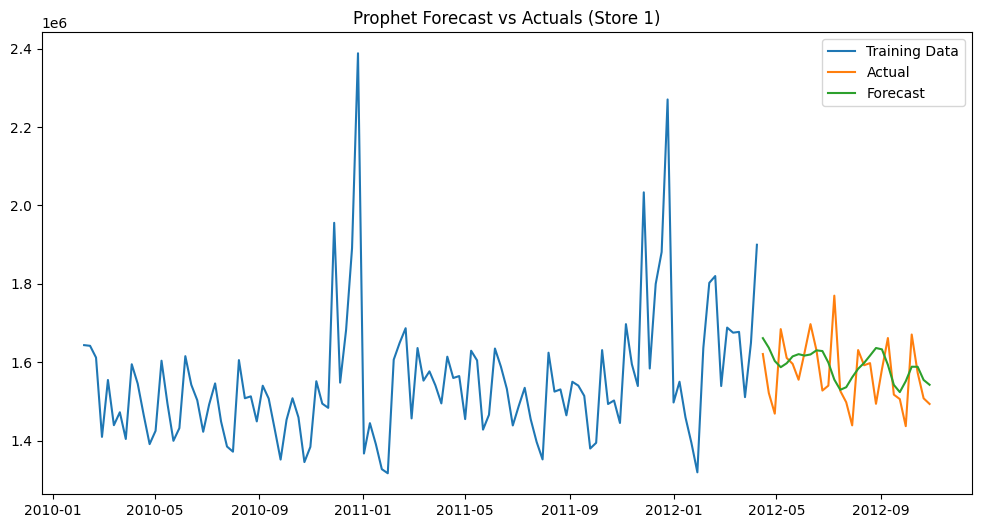

05:36:33 - cmdstanpy - INFO - Chain [1] start processing
05:36:33 - cmdstanpy - INFO - Chain [1] done processing


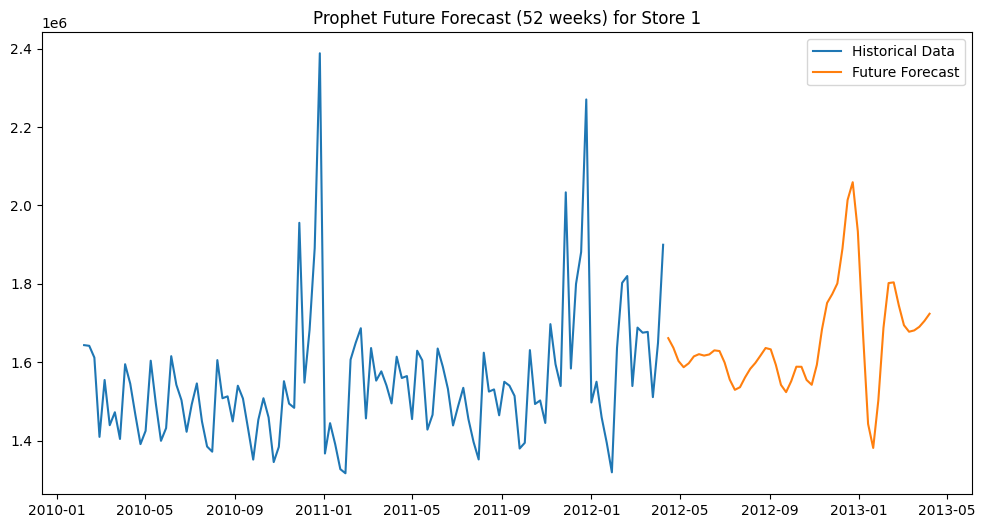

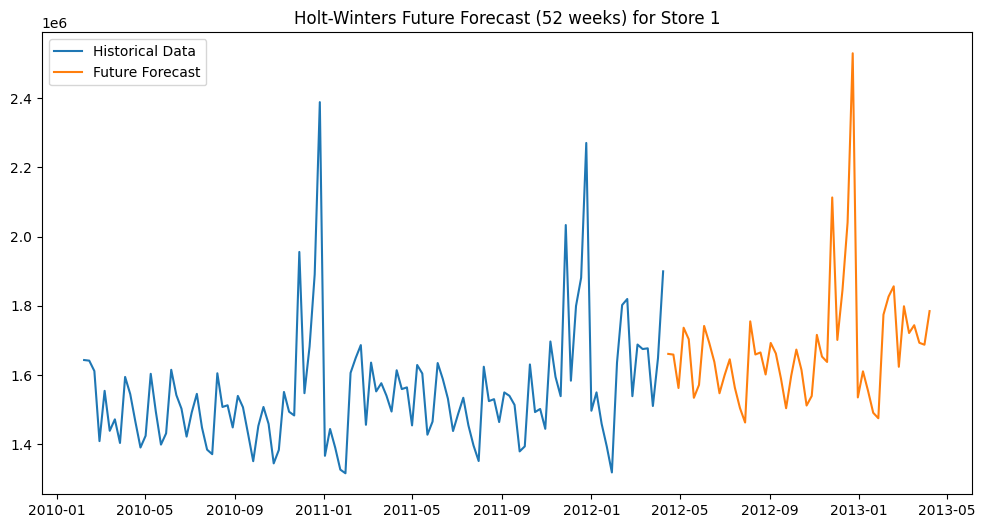


Model Comparison:


Model           RMSE            MAE
0         ARIMA  209926.269038  203230.537356
1        SARIMA  209926.269038  203230.537356
2       Prophet   79868.329608   61803.875720
3  Holt-Winters   75153.598987   58819.219511

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import zscore
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

store1_data = data[data['Store'] == 1].sort_values('Date')
store1_data = store1_data.set_index('Date')['Weekly_Sales'].resample('W').mean().fillna(method='ffill')

# Split data into train and test
train_size = int(len(store1_data) * 0.8)
train_data, test_data_ts = store1_data[:train_size], store1_data[train_size:]

# Function to evaluate models
def evaluate_model(model, train_data, test_data, model_name):
    # Fit model
    if model_name in ['ARIMA', 'SARIMA']:
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_data))
    elif model_name == 'Prophet':
        prophet_df = train_data.reset_index()
        prophet_df.columns = ['ds', 'y']
        model.fit(prophet_df)
        future = model.make_future_dataframe(periods=len(test_data), freq='W')
        forecast = model.predict(future)['yhat'][-len(test_data):]
    elif model_name == 'Holt-Winters':
        model_fit = model.fit()
        forecast = model_fit.forecast(len(test_data))
    else:
        raise ValueError("Unknown model type")

    # Calculate metrics
    mse = mean_squared_error(test_data, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_data, forecast)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Actual')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.title(f'{model_name} Forecast vs Actuals (Store 1)')
    plt.legend()
    plt.show()

    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'Forecast': forecast}

# Function for future forecasting
def future_forecast(model, train_data, periods, model_name):
    if model_name in ['ARIMA', 'SARIMA']:
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=periods)
    elif model_name == 'Prophet':
        prophet_df = train_data.reset_index()
        prophet_df.columns = ['ds', 'y']
        model.fit(prophet_df)
        future = model.make_future_dataframe(periods=periods, freq='W')
        forecast = model.predict(future)['yhat'][-periods:]
    elif model_name == 'Holt-Winters':
        model_fit = model.fit()
        forecast = model_fit.forecast(periods)
    else:
        raise ValueError("Unknown model type")

    # Create future dates
    last_date = train_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=periods, freq='W')

    # Plot future forecast
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Historical Data')
    plt.plot(future_dates, forecast, label='Future Forecast')
    plt.title(f'{model_name} Future Forecast ({periods} weeks) for Store 1')
    plt.legend()
    plt.show()

    return forecast

# Model 1: ARIMA
arima_model = ARIMA(
        train_data,
        order=(1, 1, 1),  # (p,d,q)
        seasonal_order=(1, 1, 1, 52),  # (P,D,Q,s)
        enforce_stationarity=True,
        enforce_invertibility=True
    )

# arima_order = (2, 1, 2)  # Example order, should be optimized in practice
# arima_model = ARIMA(train_data, order=arima_order)
arima_results = evaluate_model(arima_model, train_data, test_data_ts, 'ARIMA')

# Future forecasting with ARIMA
arima_future = future_forecast(arima_model, train_data, 52, 'ARIMA')

# Model 2: SARIMA
sarima_order = (1, 1, 1)
sarima_seasonal_order = (1, 1, 1, 52)  # Weekly data with yearly seasonality
sarima_model = SARIMAX(train_data, order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_results = evaluate_model(sarima_model, train_data, test_data_ts, 'SARIMA')

# Future forecasting with SARIMA
sarima_future = future_forecast(sarima_model, train_data, 52, 'SARIMA')

# Model 3: Prophet

# Train Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True)

prophet_results = evaluate_model(prophet_model, train_data, test_data_ts, 'Prophet')

# Model 3: Prophet

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Future forecasting with Prophet
prophet_future = future_forecast(prophet_model, train_data, 52, 'Prophet')

# Model 4: Holt-Winters
# test_weeks=20
trend='additive'
seasonal='additive'

holt_winters_model = ExponentialSmoothing(
    train_data,
    trend=trend,
    seasonal=seasonal,
    seasonal_periods=52,
    initialization_method='estimated'  # Weekly data with yearly seasonality
)
holt_winters_results = evaluate_model(holt_winters_model, train_data, test_data_ts, 'Holt-Winters')

# Future forecasting with Holt-Winters
holt_winters_future = future_forecast(holt_winters_model, train_data, 52, 'Holt-Winters')

# Compare all models
results_df = pd.DataFrame([arima_results, sarima_results, prophet_results, holt_winters_results])
results_df = results_df[['Model', 'RMSE', 'MAE']]  # Exclude forecast column for display
print("\nModel Comparison:")
results_df
